# Retail Buyer Segmentation
This project implements an end-to-end Retail Buyer Segmentation and Prediction system using real customer-level retail data. The objective is simple and practical:
identify distinct groups of customers based on their demographics, behavior, and purchasing patterns, then build models that can automatically assign new customers to these groups.

The workflow follows three main stages:

Understanding and preparing the data through exploratory data analysis (EDA), cleaning, missing-value handling, and feature transformation.

Discovering natural customer segments using clustering techniques applied to the full dataset and interpreting each segment in business terms.

Training classification models to predict customer segment membership for new or unseen customers, enabling scalable and automated decision-making.

This approach allows businesses to move from raw transactional data to actionable customer profiles that support targeted marketing, personalized campaigns, and reduced marketing waste.

# Dataset Overview

The dataset represents individual retail customers and combines demographic information, household structure, purchase behavior, campaign responses, and channel activity. Each row corresponds to one customer, uniquely identified by `customer_id`.

- Customer Identification & Demographics
   - `customer_id` — Unique identifier for each customer
   - `birth_year` — Year of birth (used to derive customer age)
   - `education_level` — Education category (Basic, HighSchool, Graduate, Postgraduate, Unknown)
   - `marital_status` — Marital status (Single, Married, Divorced, Widowed, Unknown)
   - `annual_income` — Household annual income (numeric)

- Household Information
  - `num_children` — Number of children living at home
  - `num_teenagers` — Number of teenagers living at home

- Customer History & Engagement
   - `signup_date` — Date when the customer first engaged with the company
   - `days_since_last_purchase` — Number of days since the customer’s most recent purchase
   - `has_recent_complaint` — Binary indicator (1 = complaint, 0 = no complaint)

- Spending Behavior
   - `spend_wine` — Spending on wine
   - `spend_fruits` — Spending on fruits
   - `spend_meat` — Spending on meat
   - `spend_fish` — Spending on fish
   - `spend_sweets` — Spending on sweets
   - `spend_gold` — Spending on gold products

These variables capture customer value and product preferences.
- Promotions & Campaign Response
   - `num_discount_purchases` — Number of purchases made using discounts
   - `accepted_campaign_1` … `accepted_campaign_5` — Binary indicators showing whether the customer accepted each promotional campaign
   - `accepted_last_campaign` — Binary indicator for acceptance of the most recent campaign

- Channels & Purchase Activity
   - `num_web_purchases` — Number of purchases made through the website
   - `num_catalog_purchases` — Number of purchases made via catalogs
   - `num_store_purchases` — Number of in-store purchases
   - `web_visits_last_month` — Number of website visits in the last month

# Import the libraries

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score,precision_score,recall_score,silhouette_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from matplotlib import colors
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier,NearestNeighbors
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import Lasso
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')


# Data Overview

In [67]:
df = pd.read_csv("Data\data.csv")

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               2240 non-null   int64  
 1   birth_year                2240 non-null   int64  
 2   education_level           2199 non-null   object 
 3   marital_status            2240 non-null   object 
 4   annual_income             2173 non-null   float64
 5   num_children              2240 non-null   int64  
 6   num_teenagers             2196 non-null   float64
 7   signup_date               2240 non-null   object 
 8   days_since_last_purchase  2240 non-null   int64  
 9   has_recent_complaint      2240 non-null   int64  
 10  spend_wine                2240 non-null   int64  
 11  spend_fruits              2240 non-null   int64  
 12  spend_meat                2240 non-null   int64  
 13  spend_fish                2240 non-null   int64  
 14  spend_sw

###### We need to convert "education_level", "marital_status", "signup_date"

In [69]:
df.describe().transpose()

count          mean           std     min  \
customer_id               2240.0   5592.159821   3246.662198     0.0   
birth_year                2240.0   1968.805804     11.984069  1893.0   
annual_income             2173.0  52266.031293  25274.007394  1730.0   
num_children              2240.0      0.444196      0.538398     0.0   
num_teenagers             2196.0      0.506375      0.543720     0.0   
days_since_last_purchase  2240.0     49.109375     28.962453     0.0   
has_recent_complaint      2240.0      0.009375      0.096391     0.0   
spend_wine                2240.0    303.935714    336.597393     0.0   
spend_fruits              2240.0     26.302232     39.773434     0.0   
spend_meat                2240.0    166.950000    225.715373     0.0   
spend_fish                2240.0     37.525446     54.628979     0.0   
spend_sweets              2240.0     27.062946     41.280498     0.0   
spend_gold                2240.0     44.021875     52.167439     0.0   
num_discount_purchases    2240.0      2.325000      1.932238     0.0   
num_web_purchases         2240.0      4.084821      2.778714     0.0   
num_catalog_purchases     2240.0      2.662054      2.923101     0.0   
num_store_purchases       2240.0      5.790179      3.250958     0.0   
web_visits_last_month     2240.0      5.316518      2.426645     0.0   
accepted_campaign_1       2240.0      0.064286      0.245316     0.0   
accepted_campaign_2       2240.0      0.013393      0.114976     0.0   
accepted_campaign_3       2240.0      0.072768      0.259813     0.0   
accepted_campaign_4       2240.0      0.074554      0.262728     0.0   
accepted_campaign_5       2240.0      0.072768      0.259813     0.0   
accepted_last_campaign    2240.0      0.149107      0.356274     0.0   

                               25%      50%       75%       max  
customer_id                2828.25   5458.5   8427.75   11191.0  
birth_year                 1959.00   1970.0   1977.00    1996.0  
annual_income             35196.00  51411.0  68487.00  666666.0  
num_children                  0.00      0.0      1.00       2.0  
num_teenagers                 0.00      0.0      1.00       2.0  
days_since_last_purchase     24.00     49.0     74.00      99.0  
has_recent_complaint          0.00      0.0      0.00       1.0  
spend_wine                   23.75    173.5    504.25    1493.0  
spend_fruits                  1.00      8.0     33.00     199.0  
spend_meat                   16.00     67.0    232.00    1725.0  
spend_fish                    3.00     12.0     50.00     259.0  
spend_sweets                  1.00      8.0     33.00     263.0  
spend_gold                    9.00     24.0     56.00     362.0  
num_discount_purchases        1.00      2.0      3.00      15.0  
num_web_purchases             2.00      4.0      6.00      27.0  
num_catalog_purchases         0.00      2.0      4.00      28.0  
num_store_purchases           3.00      5.0      8.00      13.0  
web_visits_last_month         3.00      6.0      7.00      20.0  
accepted_campaign_1           0.00      0.0      0.00       1.0  
accepted_campaign_2           0.00      0.0      0.00       1.0  
accepted_campaign_3           0.00      0.0      0.00       1.0  
accepted_campaign_4           0.00      0.0      0.00       1.0  
accepted_campaign_5           0.00      0.0      0.00       1.0  
accepted_last_campaign        0.00      0.0      0.00       1.0

###### There are nulls

##### Count of values

In [70]:
counts_all = {col: df[col].value_counts() for col in df.columns}
counts_all

{'customer_id': customer_id
 5524     1
 2174     1
 4141     1
 6182     1
 5324     1
         ..
 10870    1
 4001     1
 7270     1
 8235     1
 9405     1
 Name: count, Length: 2240, dtype: int64,
 'birth_year': birth_year
 1976    89
 1971    87
 1975    83
 1972    79
 1978    77
 1970    77
 1965    74
 1973    74
 1969    71
 1974    69
 1956    55
 1979    53
 1958    53
 1977    52
 1952    52
 1959    51
 1968    51
 1966    50
 1954    50
 1955    49
 1960    49
 1963    45
 1982    45
 1967    44
 1962    44
 1957    43
 1951    43
 1983    42
 1986    42
 1964    42
 1981    39
 1980    39
 1984    38
 1961    36
 1953    35
 1985    32
 1949    30
 1989    30
 1950    29
 1988    29
 1987    27
 1948    21
 1990    18
 1946    16
 1947    16
 1991    15
 1992    13
 1945     8
 1943     7
 1944     7
 1995     5
 1993     5
 1994     3
 1996     2
 1900     1
 1893     1
 1899     1
 1941     1
 1940     1
 Name: count, dtype: int64,
 'education_level': education_level


###### These columns have a majority of zero values: 'has_recent_complaint', 'accepted_campaign_1', 'accepted_campaign_2', 'accepted_campaign_3', 'accepted_campaign_4', 'accepted_campaign_5', and 'accepted_last_campaign'. We will drop some or engineer a new feature.

In [71]:
backup = df.copy()

In [72]:
df.nunique()

customer_id                 2240
birth_year                    59
education_level                5
marital_status                 8
annual_income               1938
num_children                   3
num_teenagers                  3
signup_date                  663
days_since_last_purchase     100
has_recent_complaint           2
spend_wine                   776
spend_fruits                 158
spend_meat                   558
spend_fish                   182
spend_sweets                 177
spend_gold                   213
num_discount_purchases        15
num_web_purchases             15
num_catalog_purchases         14
num_store_purchases           14
web_visits_last_month         16
accepted_campaign_1            2
accepted_campaign_2            2
accepted_campaign_3            2
accepted_campaign_4            2
accepted_campaign_5            2
accepted_last_campaign         2
dtype: int64

# Clean the Data

#### Duplicating

In [73]:
df.duplicated().sum()

np.int64(0)

#### Nulls

In [74]:
df.isnull().sum()

customer_id                  0
birth_year                   0
education_level             41
marital_status               0
annual_income               67
num_children                 0
num_teenagers               44
signup_date                  0
days_since_last_purchase     0
has_recent_complaint         0
spend_wine                   0
spend_fruits                 0
spend_meat                   0
spend_fish                   0
spend_sweets                 0
spend_gold                   0
num_discount_purchases       0
num_web_purchases            0
num_catalog_purchases        0
num_store_purchases          0
web_visits_last_month        0
accepted_campaign_1          0
accepted_campaign_2          0
accepted_campaign_3          0
accepted_campaign_4          0
accepted_campaign_5          0
accepted_last_campaign       0
dtype: int64

In [75]:
#df.dropna(inplace=True)

#### Fill with median or mode

In [76]:
df['annual_income'].fillna(df['annual_income'].median(), inplace=True)
df['education_level'].fillna(df['education_level'].mode()[0], inplace=True)
df['num_teenagers'].fillna(df['num_teenagers'].median(), inplace=True)

#### Imputer

In [77]:
# imputer= SimpleImputer(strategy='median') # mode
# df[['annual_income','education_level','num_teenagers']]= imputer.fit_transform(df[['annual_income','education_level','num_teenagers']])

#### KNN imputer

In [78]:
# df_encoding = df.copy()
# label_encoder = LabelEncoder()
# categorical_columns = df_encoding.select_dtypes(exclude=[np.number]).columns.tolist()
# if 'customer_id' in categorical_columns:
#     categorical_columns.remove('customer_id')
# for col in categorical_columns:
#     df_encoding[col] = label_encoder.fit_transform(df_encoding[col].astype(str))

In [79]:
# knn = KNNImputer(n_neighbors=3)
# df_KNN = knn.fit_transform(df_encoding)
# df = pd.DataFrame(df_KNN, columns=df_encoding.columns)
# df.isnull().sum()

#### Iterative imputer

In [80]:
# iter_imputer = IterativeImputer(random_state = 42)
# df_iter = iter_imputer.fit_transform(df_encoding)
# df = pd.DataFrame(df_iter, columns=df_encoding.columns)
# df.isnull().sum()

# Feature Engineering
We need to know whether the client will accept the next campaign or not.

#### Total Campaigns

In [81]:
campaign_columns = ['accepted_campaign_1', 'accepted_campaign_2', 'accepted_campaign_3', 'accepted_campaign_4', 'accepted_campaign_5', 'accepted_last_campaign']
df['total_accepted_campaigns'] = df[campaign_columns].max(axis=1)
df['total_accepted_campaigns'].value_counts()

total_accepted_campaigns
0    1631
1     609
Name: count, dtype: int64

- `.sum` when every column has a value.
- `.max` for an OR-style aggregation.
- `.min` for an AND-style aggregation.

#### Age

In [82]:
ref_year = 2014
df['age'] = ref_year - df['birth_year']


We use 2014 because this is the last year available in the signup data.

#### The data

In [83]:

def parse_date(s):
    for fmt in ('%d-%m-%Y','%d/%m/%Y','%m/%d/%Y','%d-%m-%y','%d/%m/%y'):
        try:
            return pd.to_datetime(s, format=fmt)
        except:
            continue
    try:
        return pd.to_datetime(s, dayfirst=True, errors='coerce')
    except:
        return pd.NaT

In [84]:
df['signup_date_parsed'] = df['signup_date'].apply(parse_date)
print("Unparsed signup_date:", df['signup_date_parsed'].isna().sum())

df['signup_year'] = df['signup_date_parsed'].dt.year.fillna(0).astype(int)

Unparsed signup_date: 0


We need to parse the `signup_date` column to a datetime type to create a signup year column.

##### Total Spend

In [85]:
total_spend = ['spend_wine', 'spend_fruits', 'spend_meat', 'spend_fish', 'spend_sweets', 'spend_gold']
df['total_spent'] = df[total_spend].sum(axis=1)

#### Total Purchases

In [86]:
total_purchases = ['num_discount_purchases', 'num_web_purchases', 'num_catalog_purchases', 'num_store_purchases']
df['total_purchases'] = df[total_purchases].sum(axis=1)

### Living with

In [87]:
df["living_with"]=df["marital_status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

In [88]:
df['children'] = df['num_teenagers'] + df['num_children']

In [89]:
df["family_size"] = df["living_with"].replace({"Alone": 1, "Partner":2}) + df["children"]

###### I will try the median

#### Education

In [90]:
df["education_level"]=df["education_level"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#### Dropping

In [91]:
df.drop(columns=['has_recent_complaint','accepted_campaign_1','accepted_campaign_2',
'accepted_campaign_3','accepted_campaign_4','accepted_campaign_5','accepted_last_campaign',
'customer_id','signup_date_parsed', 'birth_year', 'signup_date', 'marital_status','living_with',
'children'],axis=1,inplace=True)
df.head()

education_level  annual_income  num_children  num_teenagers  \
0        Graduate        58138.0             0            0.0   
1        Graduate        46344.0             1            1.0   
2        Graduate        71613.0             0            0.0   
3        Graduate        26646.0             1            0.0   
4    Postgraduate        58293.0             1            0.0   

   days_since_last_purchase  spend_wine  spend_fruits  spend_meat  spend_fish  \
0                        58         635            88         546         172   
1                        38          11             1           6           2   
2                        26         426            49         127         111   
3                        26          11             4          20          10   
4                        94         173            43         118          46   

   spend_sweets  ...  num_web_purchases  num_catalog_purchases  \
0            88  ...                  8                     10   
1             1  ...                  1                      1   
2            21  ...                  8                      2   
3             3  ...                  2                      0   
4            27  ...                  5                      3   

   num_store_purchases  web_visits_last_month  total_accepted_campaigns  age  \
0                    4                      7                         1   57   
1                    2                      5                         0   60   
2                   10                      4                         0   49   
3                    4                      6                         0   30   
4                    6                      5                         0   33   

   signup_year  total_spent  total_purchases  family_size  
0         2012         1617               25          1.0  
1         2014           27                6          3.0  
2         2013          776               21          2.0  
3         2014           53                8          3.0  
4         2014          422               19          3.0  

[5 rows x 22 columns]

In [92]:
df.shape

(2240, 22)

### Numerical Columns

In [93]:
numerical_cols = ['annual_income', 'days_since_last_purchase',
'spend_wine', 'spend_fruits', 'spend_meat', 'spend_fish',
'spend_sweets', 'spend_gold', 'num_discount_purchases',
'num_web_purchases', 'num_catalog_purchases', 'num_store_purchases',
'web_visits_last_month','age', 'total_spent', 'total_purchases']

num_cols = df[numerical_cols]
num_cols

annual_income  days_since_last_purchase  spend_wine  spend_fruits  \
0           58138.0                        58         635            88   
1           46344.0                        38          11             1   
2           71613.0                        26         426            49   
3           26646.0                        26          11             4   
4           58293.0                        94         173            43   
...             ...                       ...         ...           ...   
2235        61223.0                        46         709            43   
2236        64014.0                        56         406             0   
2237        56981.0                        91         908            48   
2238        69245.0                         8         428            30   
2239        52869.0                        40          84             3   

      spend_meat  spend_fish  spend_sweets  spend_gold  \
0            546         172            88          88   
1              6           2             1           6   
2            127         111            21          42   
3             20          10             3           5   
4            118          46            27          15   
...          ...         ...           ...         ...   
2235         182          42           118         247   
2236          30           0             0           8   
2237         217          32            12          24   
2238         214          80            30          61   
2239          61           2             1          21   

      num_discount_purchases  num_web_purchases  num_catalog_purchases  \
0                          3                  8                     10   
1                          2                  1                      1   
2                          1                  8                      2   
3                          2                  2                      0   
4                          5                  5                      3   
...                      ...                ...                    ...   
2235                       2                  9                      3   
2236                       7                  8                      2   
2237                       1                  2                      3   
2238                       2                  6                      5   
2239                       3                  3                      1   

      num_store_purchases  web_visits_last_month  age  total_spent  \
0                       4                      7   57         1617   
1                       2                      5   60           27   
2                      10                      4   49          776   
3                       4                      6   30           53   
4                       6                      5   33          422   
...                   ...                    ...  ...          ...   
2235                    4                      5   47         1341   
2236                    5                      7   68          444   
2237                   13                      6   33         1241   
2238                   10                      3   58          843   
2239                    4                      7   60          172   

      total_purchases  
0                  25  
1                   6  
2                  21  
3                   8  
4                  19  
...               ...  
2235               18  
2236               22  
2237               19  
2238               23  
2239               11  

[2240 rows x 16 columns]

##### Categorical Columns

In [94]:
categorical_cols = ['signup_year','total_accepted_campaigns', 'num_children',
'num_teenagers','education_level'
]
cat_cols = df[categorical_cols]
cat_cols

signup_year  total_accepted_campaigns  num_children  num_teenagers  \
0            2012                         1             0            0.0   
1            2014                         0             1            1.0   
2            2013                         0             0            0.0   
3            2014                         0             1            0.0   
4            2014                         0             1            0.0   
...           ...                       ...           ...            ...   
2235         2013                         0             0            1.0   
2236         2014                         1             2            1.0   
2237         2014                         1             0            0.0   
2238         2014                         0             0            1.0   
2239         2012                         1             1            1.0   

     education_level  
0           Graduate  
1           Graduate  
2           Graduate  
3           Graduate  
4       Postgraduate  
...              ...  
2235        Graduate  
2236    Postgraduate  
2237        Graduate  
2238    Postgraduate  
2239    Postgraduate  

[2240 rows x 5 columns]

# EDA


## Analyze Numerical Feature Distributions

Visualize the distributions of numerical features using histograms and box plots to identify their spread, central tendency, and potential outliers.


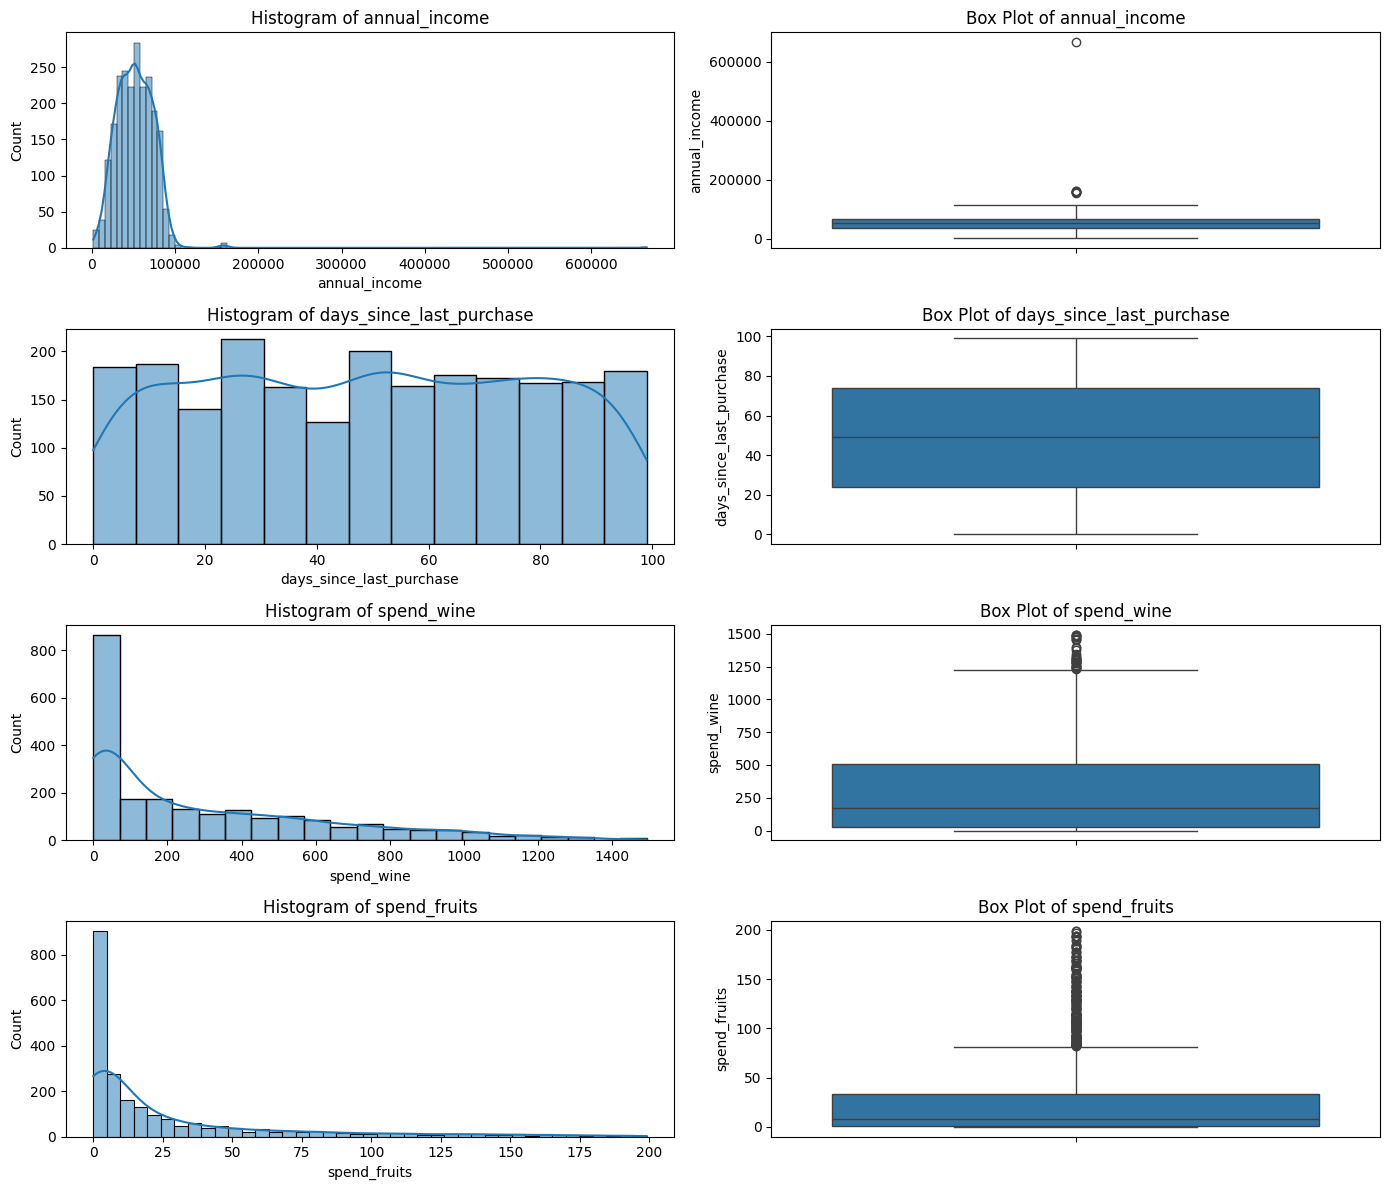

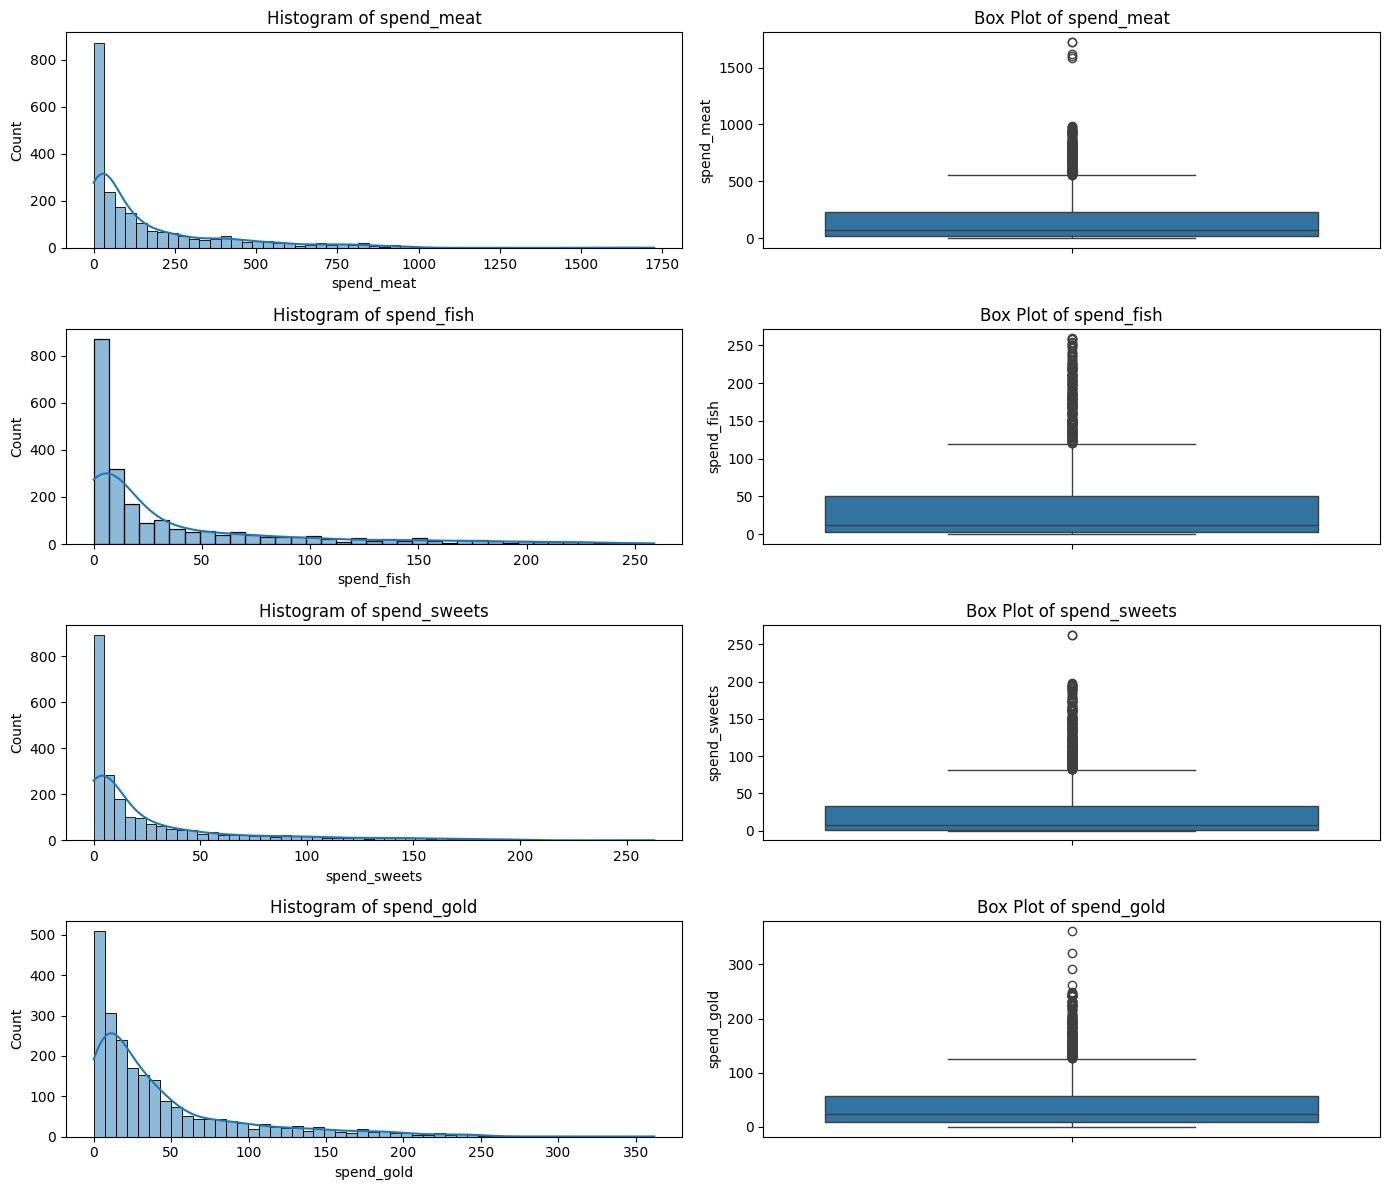

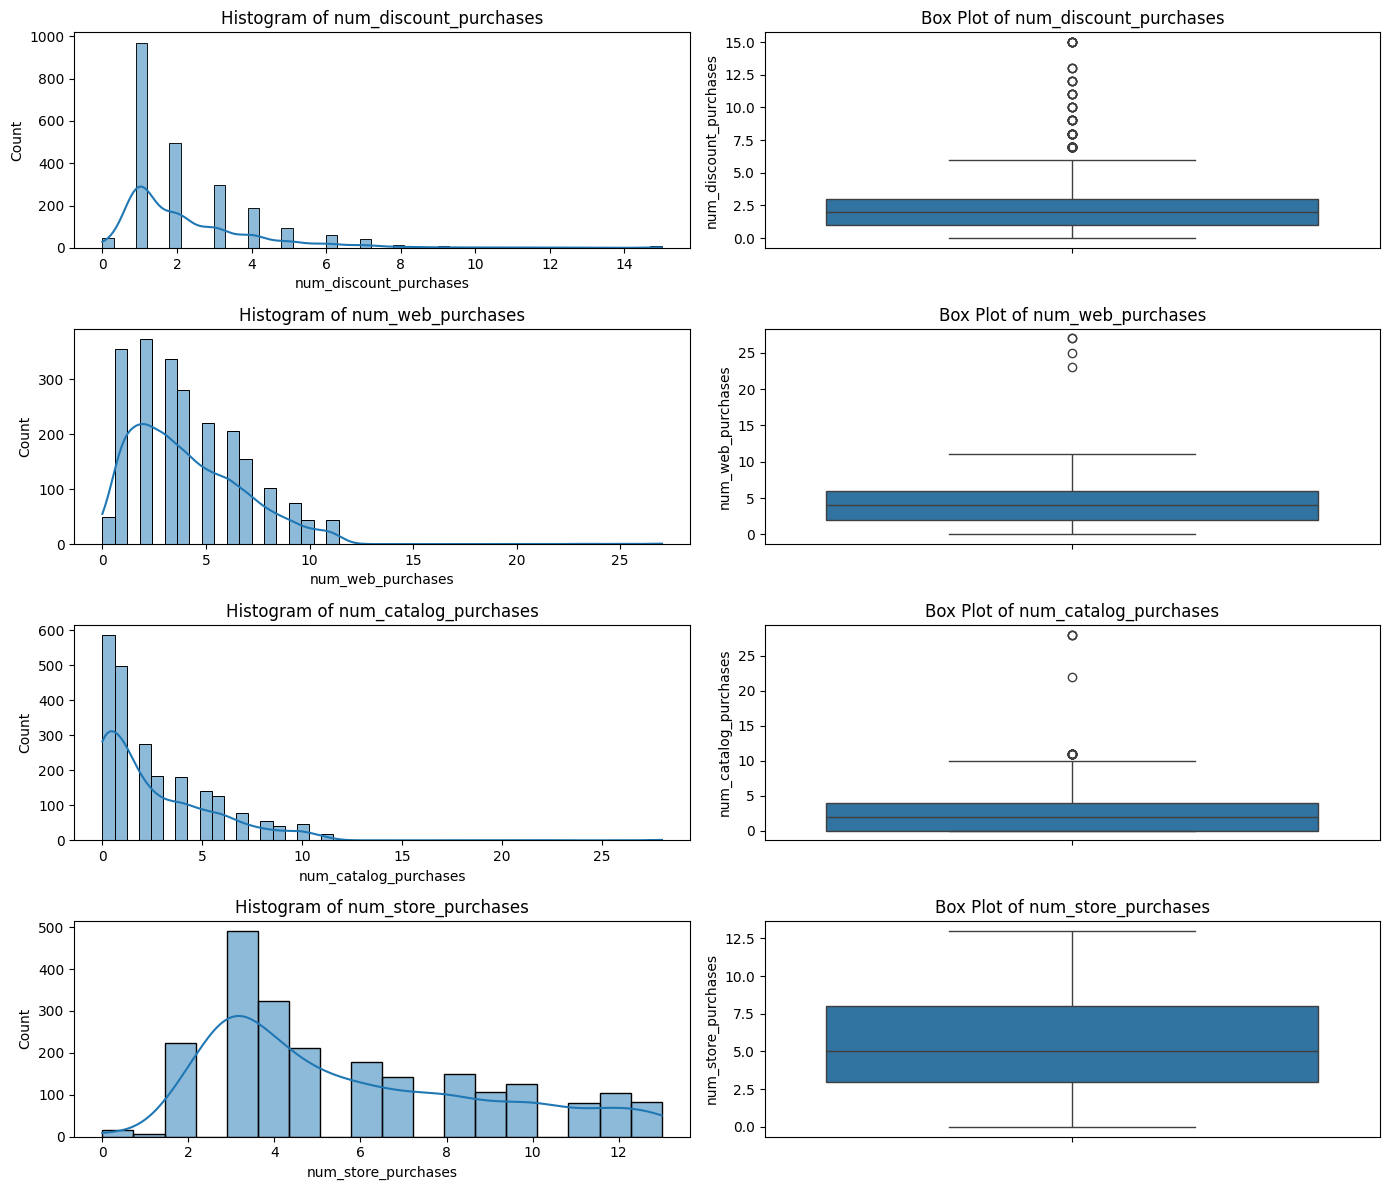

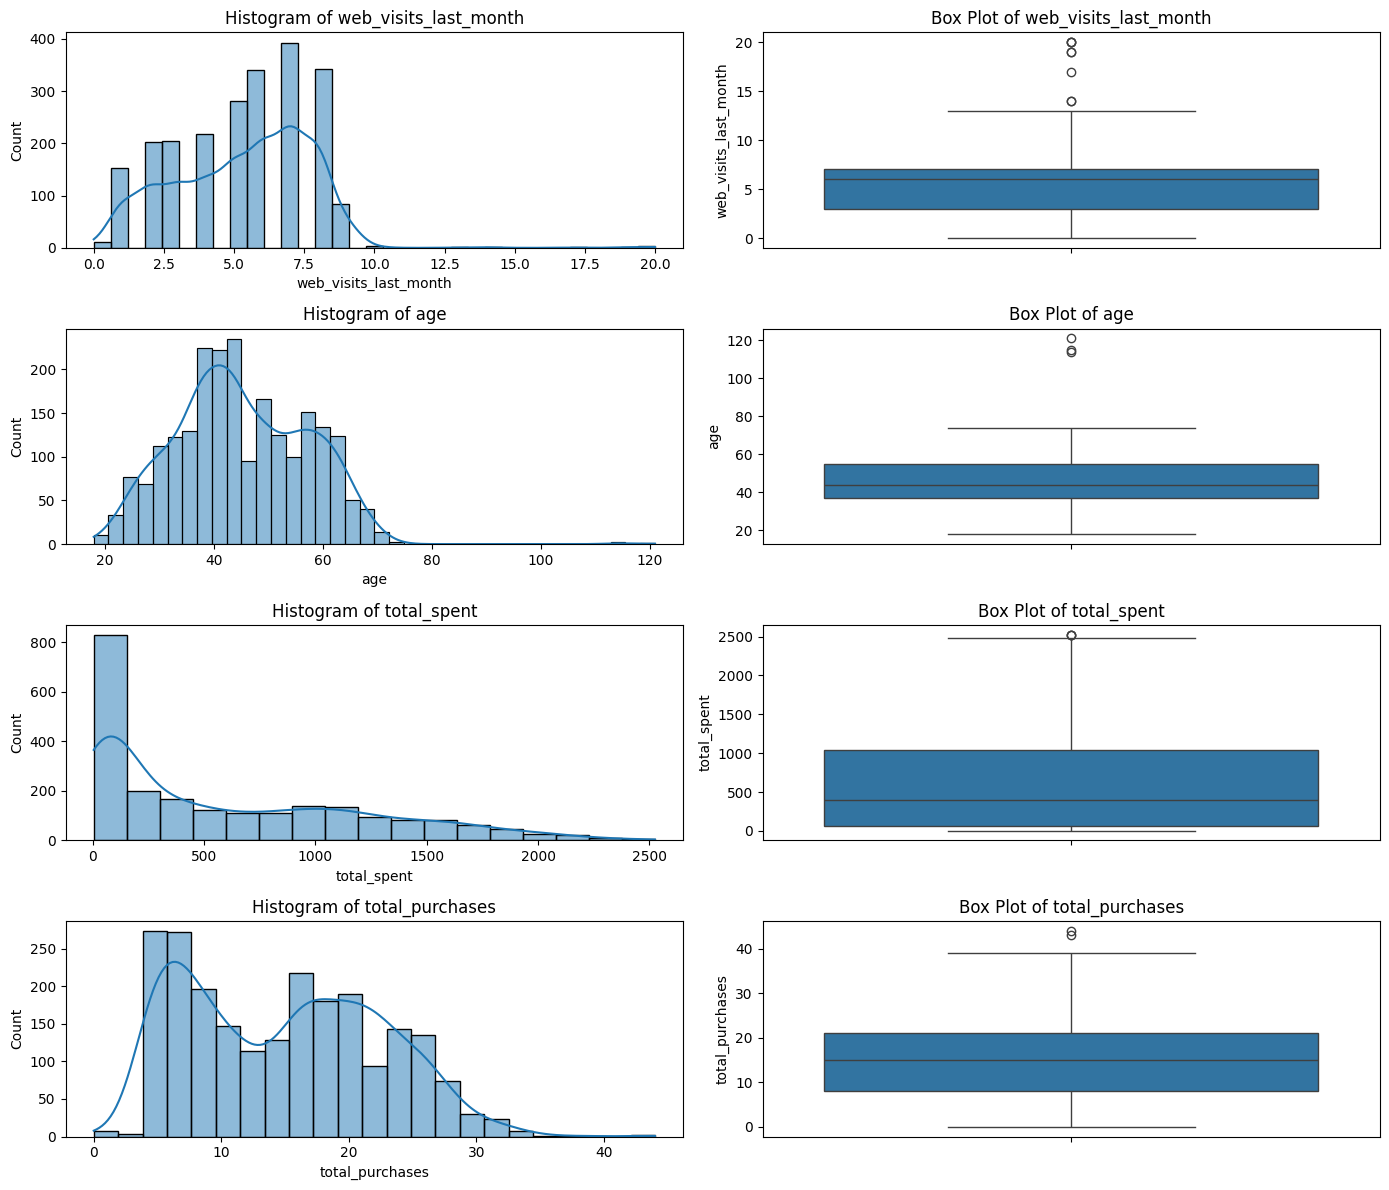

In [95]:
batch_size = 4  

for batch_start in range(0, len(num_cols.columns), batch_size):
    batch_cols = num_cols.columns[batch_start:batch_start + batch_size]

    plt.figure(figsize=(14, 3 * len(batch_cols)))

    for i, col in enumerate(batch_cols):
        plt.subplot(len(batch_cols), 2, 2*i + 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col}')

        plt.subplot(len(batch_cols), 2, 2*i + 2)
        sns.boxplot(y=df[col])
        plt.title(f'Box Plot of {col}')

    plt.tight_layout()
    plt.show()

## Analyze Categorical Feature Distributions


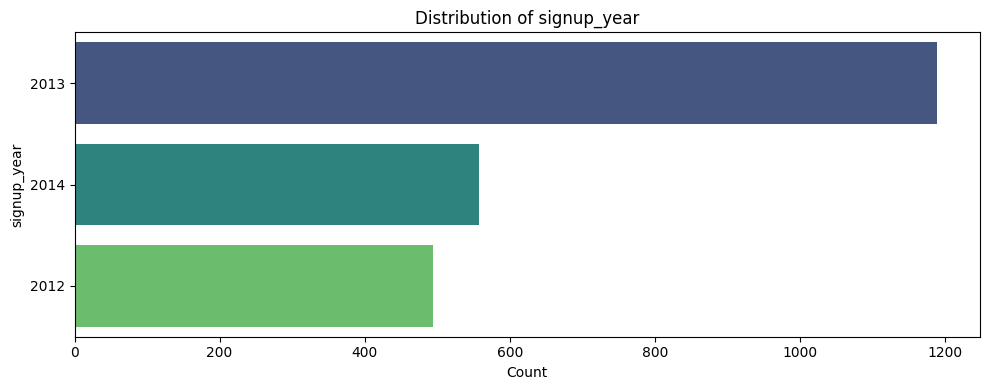

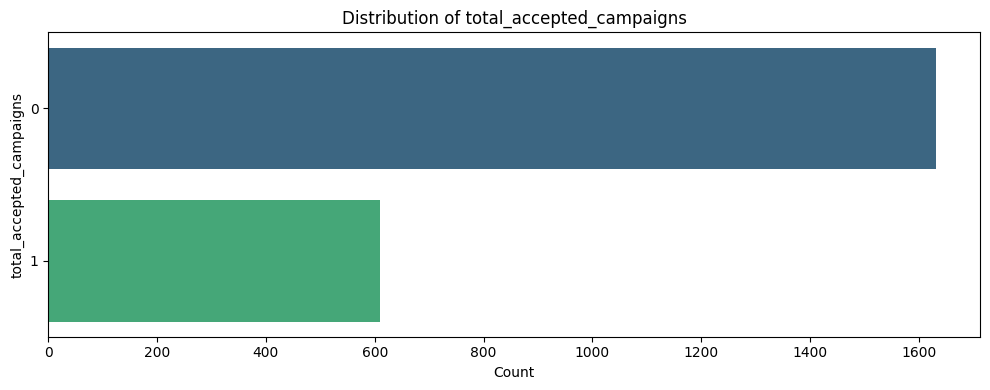

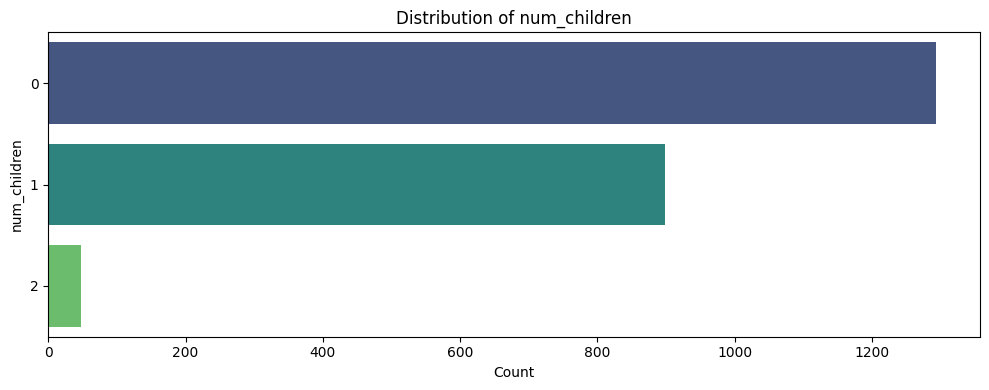

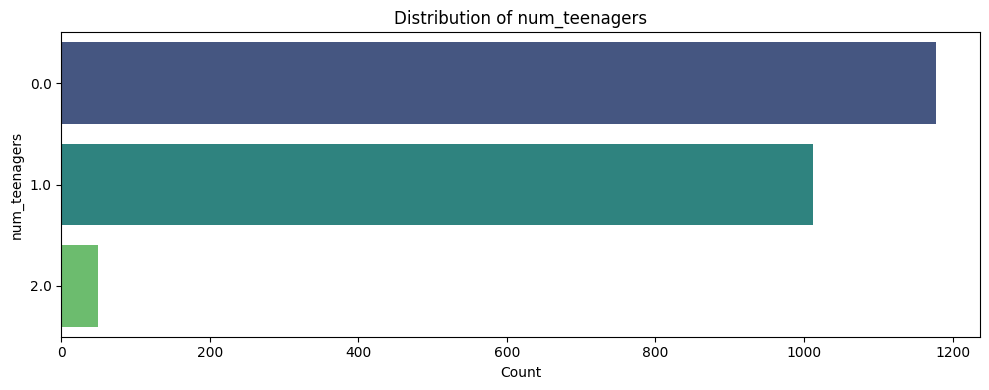

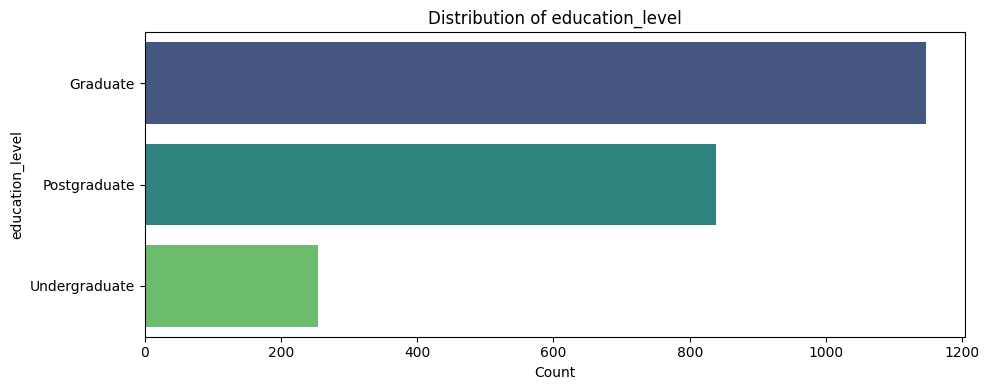

In [96]:
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()
    plt.close()  

## Analyze Numerical Feature Correlations

### Subtask:
Explore correlations between numerical features using a heatmap to identify strong positive or negative relationships.

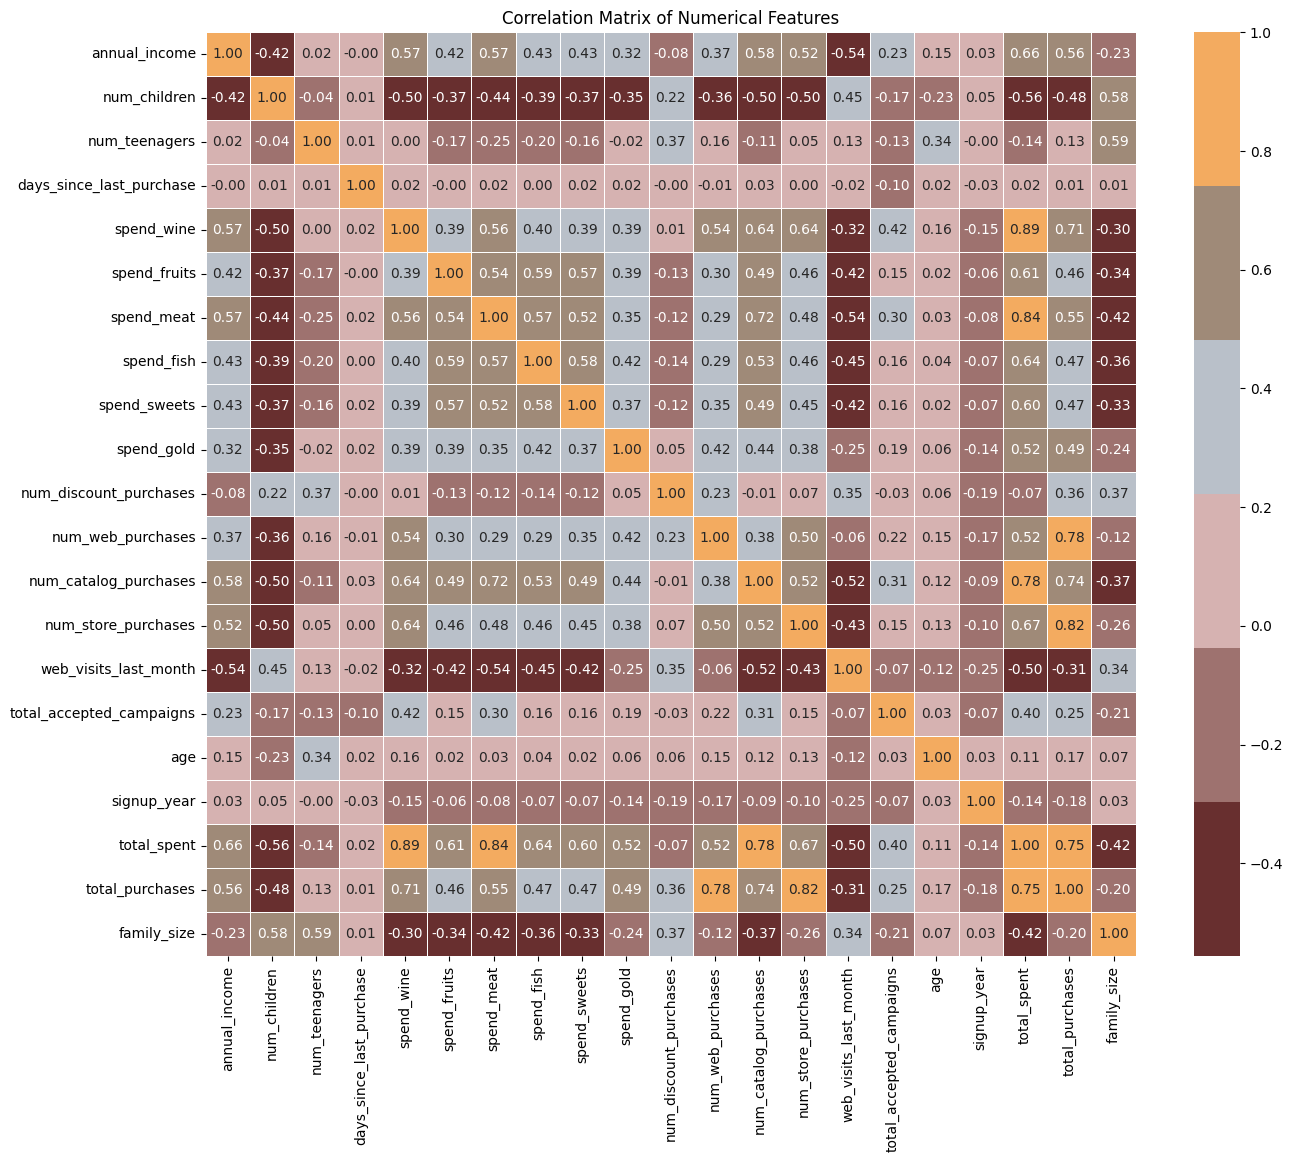

In [97]:
nums_cols = df.select_dtypes(include = ['int','float'])
correlation_matrix = df[nums_cols.columns].corr()
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap= cmap, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


remove meat, wine spend, catalog

## Analyze `total_accepted_campaigns` Feature

### Subtask:
Examine the distribution and relationships of the 'total_accepted_campaigns' feature.

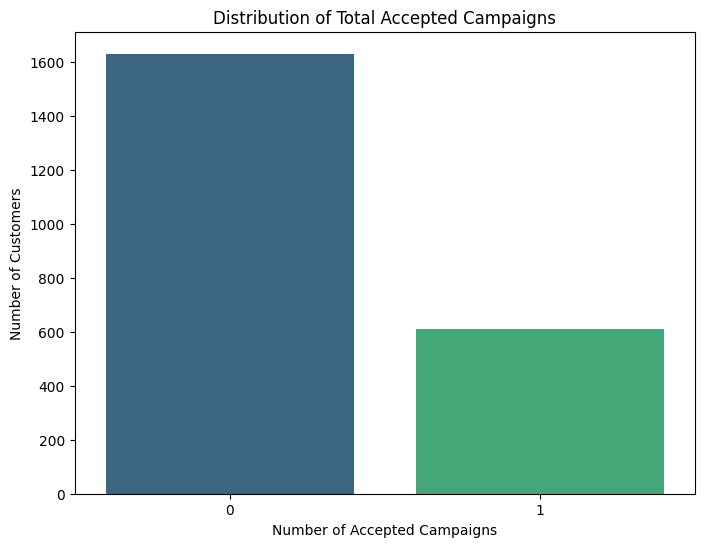

In [98]:
plt.figure(figsize=(8, 6))
sns.countplot(x='total_accepted_campaigns', data=df, palette='viridis')
plt.title('Distribution of Total Accepted Campaigns')
plt.xlabel('Number of Accepted Campaigns')
plt.ylabel('Number of Customers')
plt.show()


## Analyze 'total_accepted_campaigns' feature relationships

relationships between 'total_accepted_campaigns' and other relevant features, such as 'annual_income' and 'education_level'.


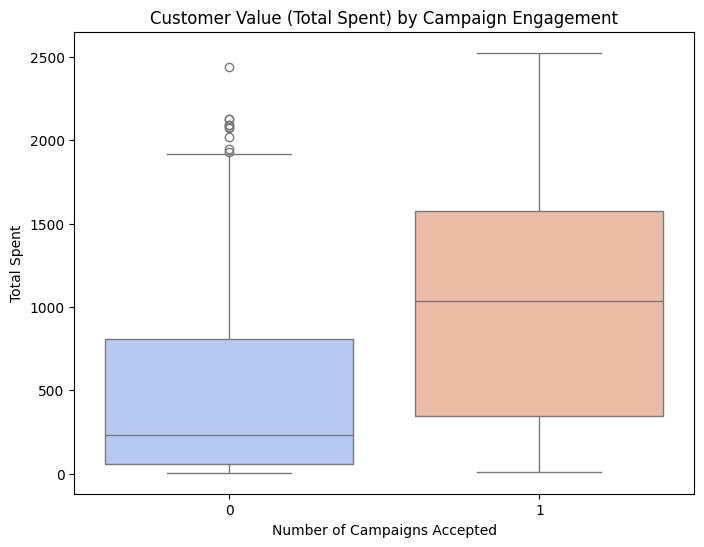

In [99]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='total_accepted_campaigns', y='total_spent', data=df, palette='coolwarm')
plt.title('Customer Value (Total Spent) by Campaign Engagement')
plt.xlabel('Number of Campaigns Accepted')
plt.ylabel('Total Spent')
plt.show()

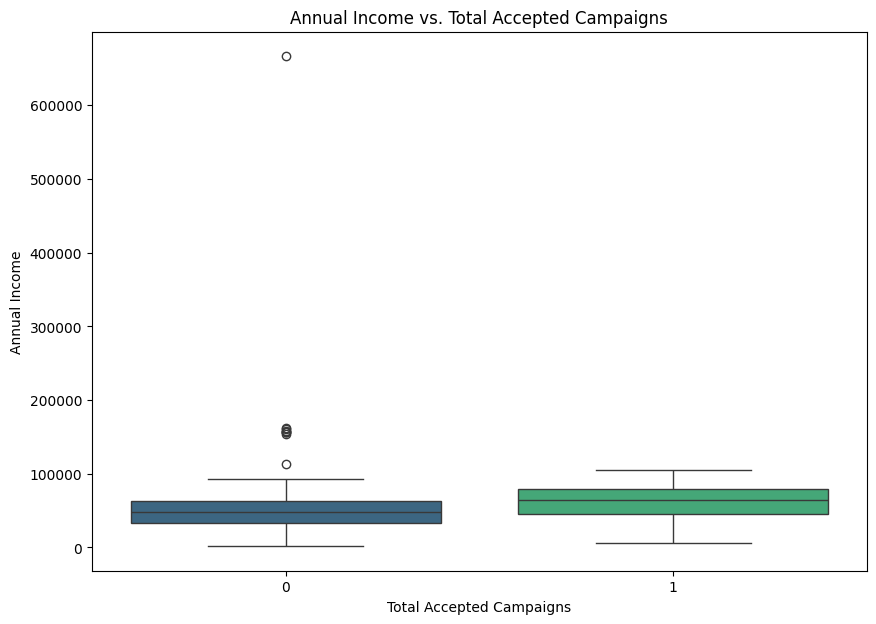

In [100]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='total_accepted_campaigns', y='annual_income', data=df, palette='viridis')
plt.title('Annual Income vs. Total Accepted Campaigns')
plt.xlabel('Total Accepted Campaigns')
plt.ylabel('Annual Income')
plt.show()


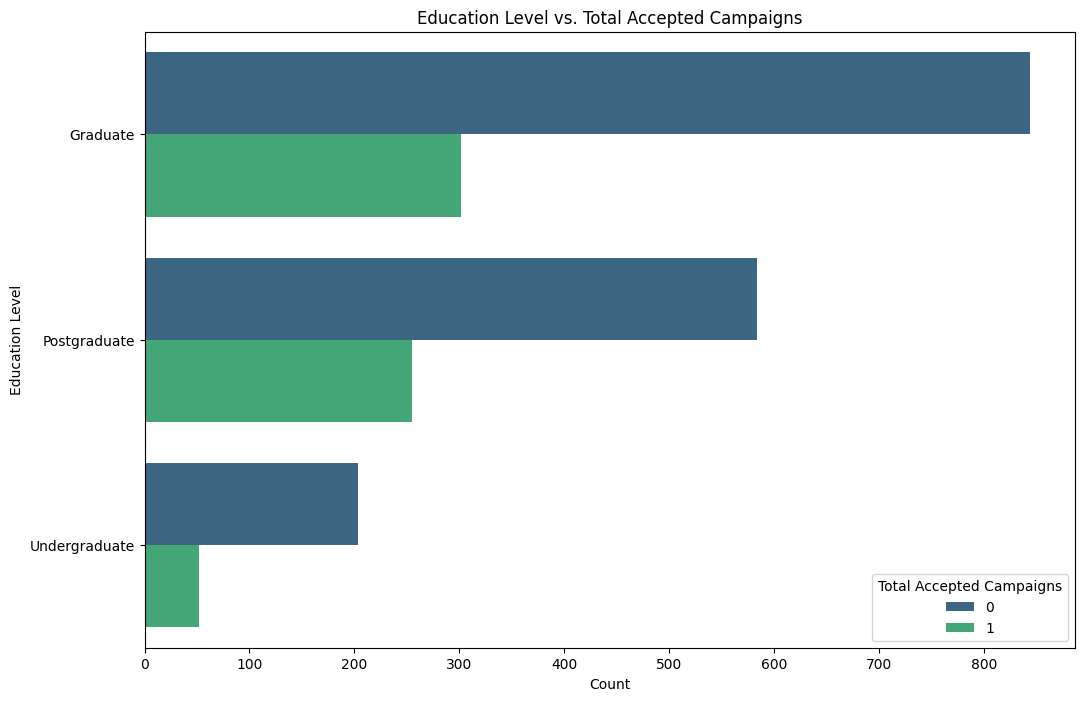

In [101]:
plt.figure(figsize=(12, 8))
sns.countplot(y='education_level', hue='total_accepted_campaigns', data=df, palette='viridis')
plt.title('Education Level vs. Total Accepted Campaigns')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.legend(title='Total Accepted Campaigns')
plt.show()


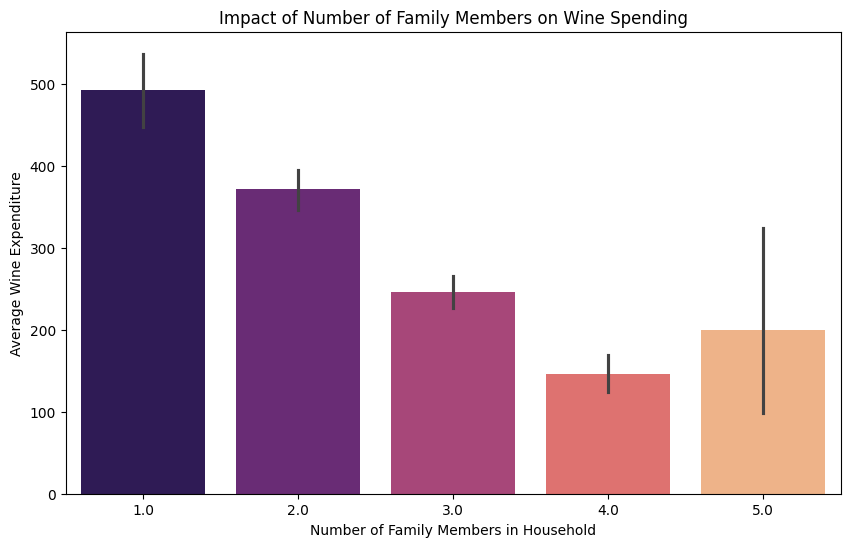

In [102]:
plt.figure(figsize=(10, 6))
sns.barplot(x='family_size', y='spend_wine', data=df, palette='magma')
plt.title('Impact of Number of Family Members on Wine Spending')
plt.xlabel('Number of Family Members in Household')
plt.ylabel('Average Wine Expenditure')
plt.show()

# Preprocessing

#### Handle outliers

In [103]:
df.shape

(2240, 22)

In [104]:
for col in num_cols.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    print (outliers_iqr.count())



education_level             8
annual_income               8
num_children                8
num_teenagers               8
days_since_last_purchase    8
spend_wine                  8
spend_fruits                8
spend_meat                  8
spend_fish                  8
spend_sweets                8
spend_gold                  8
num_discount_purchases      8
num_web_purchases           8
num_catalog_purchases       8
num_store_purchases         8
web_visits_last_month       8
total_accepted_campaigns    8
age                         8
signup_year                 8
total_spent                 8
total_purchases             8
family_size                 8
dtype: int64
education_level             0
annual_income               0
num_children                0
num_teenagers               0
days_since_last_purchase    0
spend_wine                  0
spend_fruits                0
spend_meat                  0
spend_fish                  0
spend_sweets                0
spend_gold                 

### Encoding

In [105]:
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
categorical_cols

['education_level']

In [106]:
label_encoder= LabelEncoder()
df['education_level'] = label_encoder.fit_transform(df['education_level'])


In [107]:
df.head()

education_level  annual_income  num_children  num_teenagers  \
0                0        58138.0             0            0.0   
1                0        46344.0             1            1.0   
2                0        71613.0             0            0.0   
3                0        26646.0             1            0.0   
4                1        58293.0             1            0.0   

   days_since_last_purchase  spend_wine  spend_fruits  spend_meat  spend_fish  \
0                        58         635            81         546       120.5   
1                        38          11             1           6         2.0   
2                        26         426            49         127       111.0   
3                        26          11             4          20        10.0   
4                        94         173            43         118        46.0   

   spend_sweets  ...  num_web_purchases  num_catalog_purchases  \
0            81  ...                  8                     10   
1             1  ...                  1                      1   
2            21  ...                  8                      2   
3             3  ...                  2                      0   
4            27  ...                  5                      3   

   num_store_purchases  web_visits_last_month  total_accepted_campaigns  age  \
0                    4                      7                         1   57   
1                    2                      5                         0   60   
2                   10                      4                         0   49   
3                    4                      6                         0   30   
4                    6                      5                         0   33   

   signup_year  total_spent  total_purchases  family_size  
0         2012       1617.0             25.0          1.0  
1         2014         27.0              6.0          3.0  
2         2013        776.0             21.0          2.0  
3         2014         53.0              8.0          3.0  
4         2014        422.0             19.0          3.0  

[5 rows x 22 columns]

### Normlization

In [108]:
cols = ['annual_income','spend_wine', 'spend_fruits', 'spend_meat',
        'spend_fish','spend_sweets', 'spend_gold',
        'num_discount_purchases','num_web_purchases',
        'num_catalog_purchases', 'num_store_purchases',
        'web_visits_last_month', 'total_spent']

pt = PowerTransformer(method='yeo-johnson')

df[cols] = pt.fit_transform(df[cols])
df.head()

education_level  annual_income  num_children  num_teenagers  \
0                0       0.333964             0            0.0   
1                0      -0.226114             1            1.0   
2                0       0.949251             0            0.0   
3                0      -1.226416             1            0.0   
4                1       0.341179             1            0.0   

   days_since_last_purchase  spend_wine  spend_fruits  spend_meat  spend_fish  \
0                        58    1.062784      1.487681    1.504406    1.493989   
1                        38   -1.211545     -1.001121   -1.376502   -0.889143   
2                        26    0.748918      1.145877    0.456428    1.435812   
3                        26   -1.211545     -0.403311   -0.722233   -0.110828   
4                        94    0.123712      1.058075    0.406278    0.832291   

   spend_sweets  ...  num_web_purchases  num_catalog_purchases  \
0      1.474200  ...           1.358219               1.756826   
1     -0.987648  ...          -1.357883              -0.380498   
2      0.579704  ...           1.358219               0.154282   
3     -0.542753  ...          -0.720558              -1.335398   
4      0.741799  ...           0.525667               0.523444   

   num_store_purchases  web_visits_last_month  total_accepted_campaigns  age  \
0            -0.415926               0.720800                         1   57   
1            -1.418287              -0.146845                         0   60   
2             1.244092              -0.571328                         0   49   
3            -0.415926               0.284150                         0   30   
4             0.275211              -0.146845                         0   33   

   signup_year  total_spent  total_purchases  family_size  
0         2012     1.315365             25.0          1.0  
1         2014    -1.441417              6.0          3.0  
2         2013     0.661170             21.0          2.0  
3         2014    -1.117211              8.0          3.0  
4         2014     0.179322             19.0          3.0  

[5 rows x 22 columns]

### Standardization

In [109]:

cols_to_standardize = [
    'annual_income',
    'age', 'signup_year',
    'total_accepted_campaigns',
    'days_since_last_purchase',
    #'spend_wine', 'spend_fruits',
    #'spend_meat', 'spend_fish',
    #'spend_sweets', 'spend_gold',
    #'num_children', 'num_teenagers',
    #'num_discount_purchases',
    #'num_web_purchases',
    #'num_catalog_purchases',
    #'num_store_purchases',
    'web_visits_last_month',
    'total_spent', 'total_purchases', 'family_size','education_level'
]

#scaler = StandardScaler()
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[cols_to_standardize] = scaler.fit_transform(df[cols_to_standardize])


In [110]:
df_scaled.head()

education_level  annual_income  num_children  num_teenagers  \
0              0.0       0.553381             0            0.0   
1              0.0       0.453996             1            1.0   
2              0.0       0.662562             0            0.0   
3              0.0       0.276494             1            0.0   
4              0.5       0.554661             1            0.0   

   days_since_last_purchase  spend_wine  spend_fruits  spend_meat  spend_fish  \
0                  0.585859    1.062784      1.487681    1.504406    1.493989   
1                  0.383838   -1.211545     -1.001121   -1.376502   -0.889143   
2                  0.262626    0.748918      1.145877    0.456428    1.435812   
3                  0.262626   -1.211545     -0.403311   -0.722233   -0.110828   
4                  0.949495    0.123712      1.058075    0.406278    0.832291   

   spend_sweets  ...  num_web_purchases  num_catalog_purchases  \
0      1.474200  ...           1.358219               1.756826   
1     -0.987648  ...          -1.357883              -0.380498   
2      0.579704  ...           1.358219               0.154282   
3     -0.542753  ...          -0.720558              -1.335398   
4      0.741799  ...           0.525667               0.523444   

   num_store_purchases  web_visits_last_month  total_accepted_campaigns  \
0            -0.415926               0.515871                       1.0   
1            -1.418287               0.360876                       0.0   
2             1.244092               0.285047                       0.0   
3            -0.415926               0.437868                       0.0   
4             0.275211               0.360876                       0.0   

        age  signup_year  total_spent  total_purchases  family_size  
0  0.609375          0.0     0.886214         0.617284         0.00  
1  0.656250          1.0     0.164498         0.148148         0.50  
2  0.484375          0.5     0.714948         0.518519         0.25  
3  0.187500          1.0     0.249374         0.197531         0.50  
4  0.234375          1.0     0.588802         0.469136         0.50  

[5 rows x 22 columns]

## Reviewing Data after Preprocessing

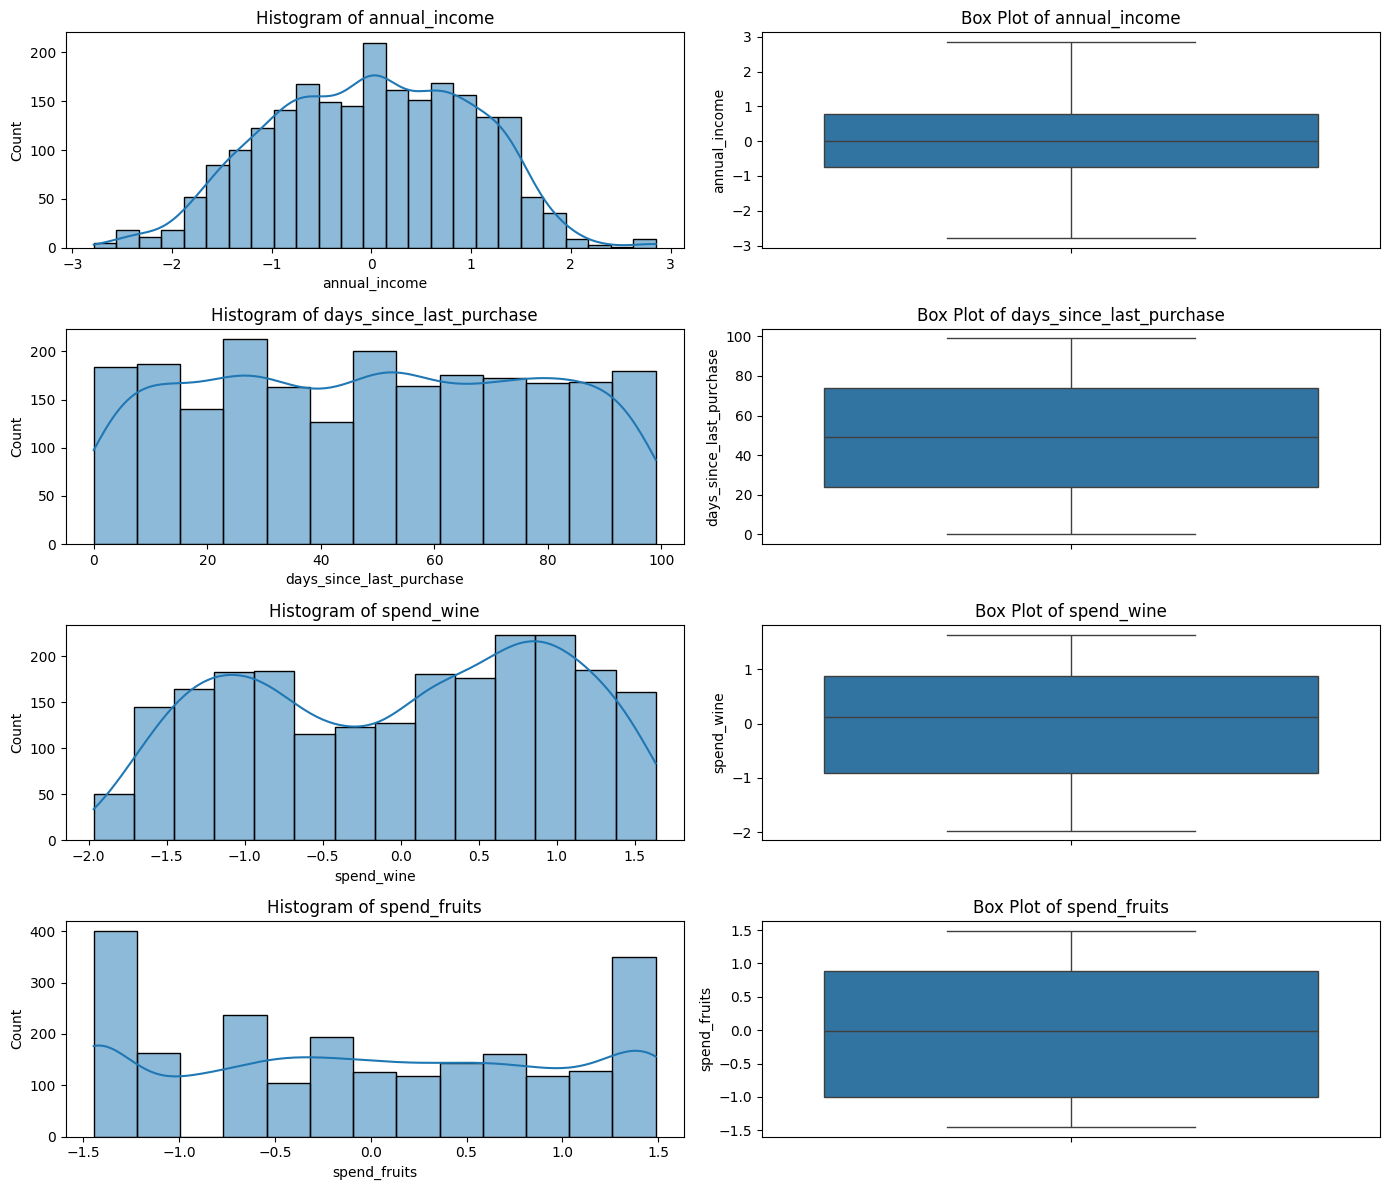

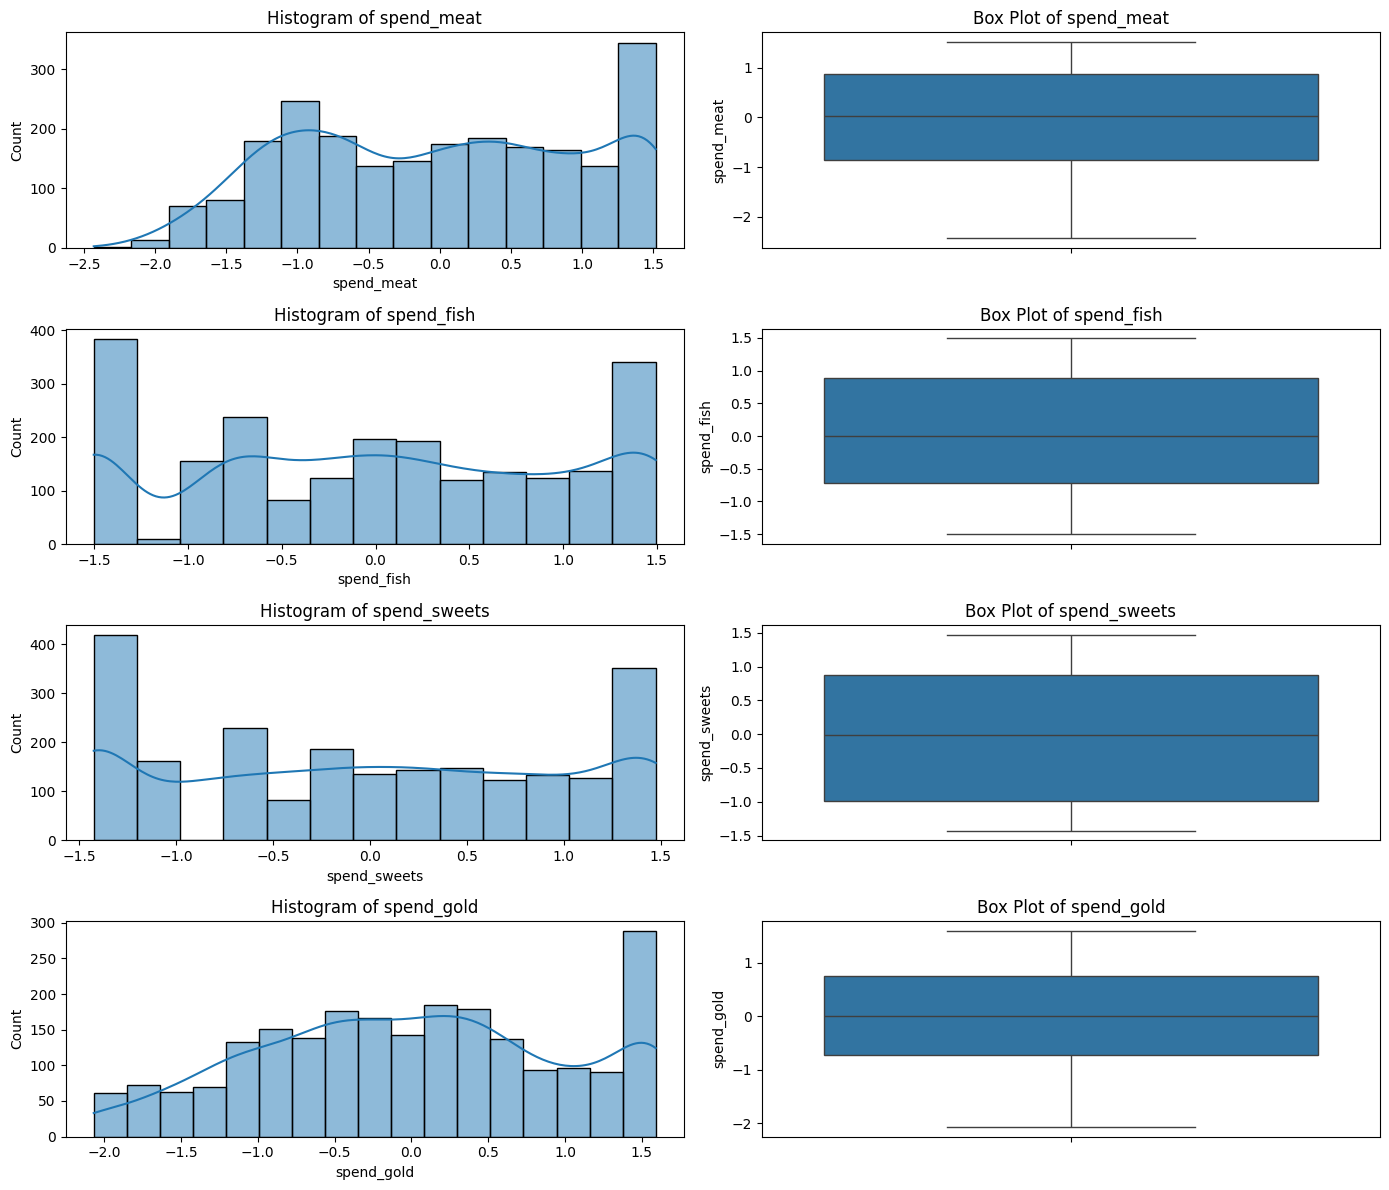

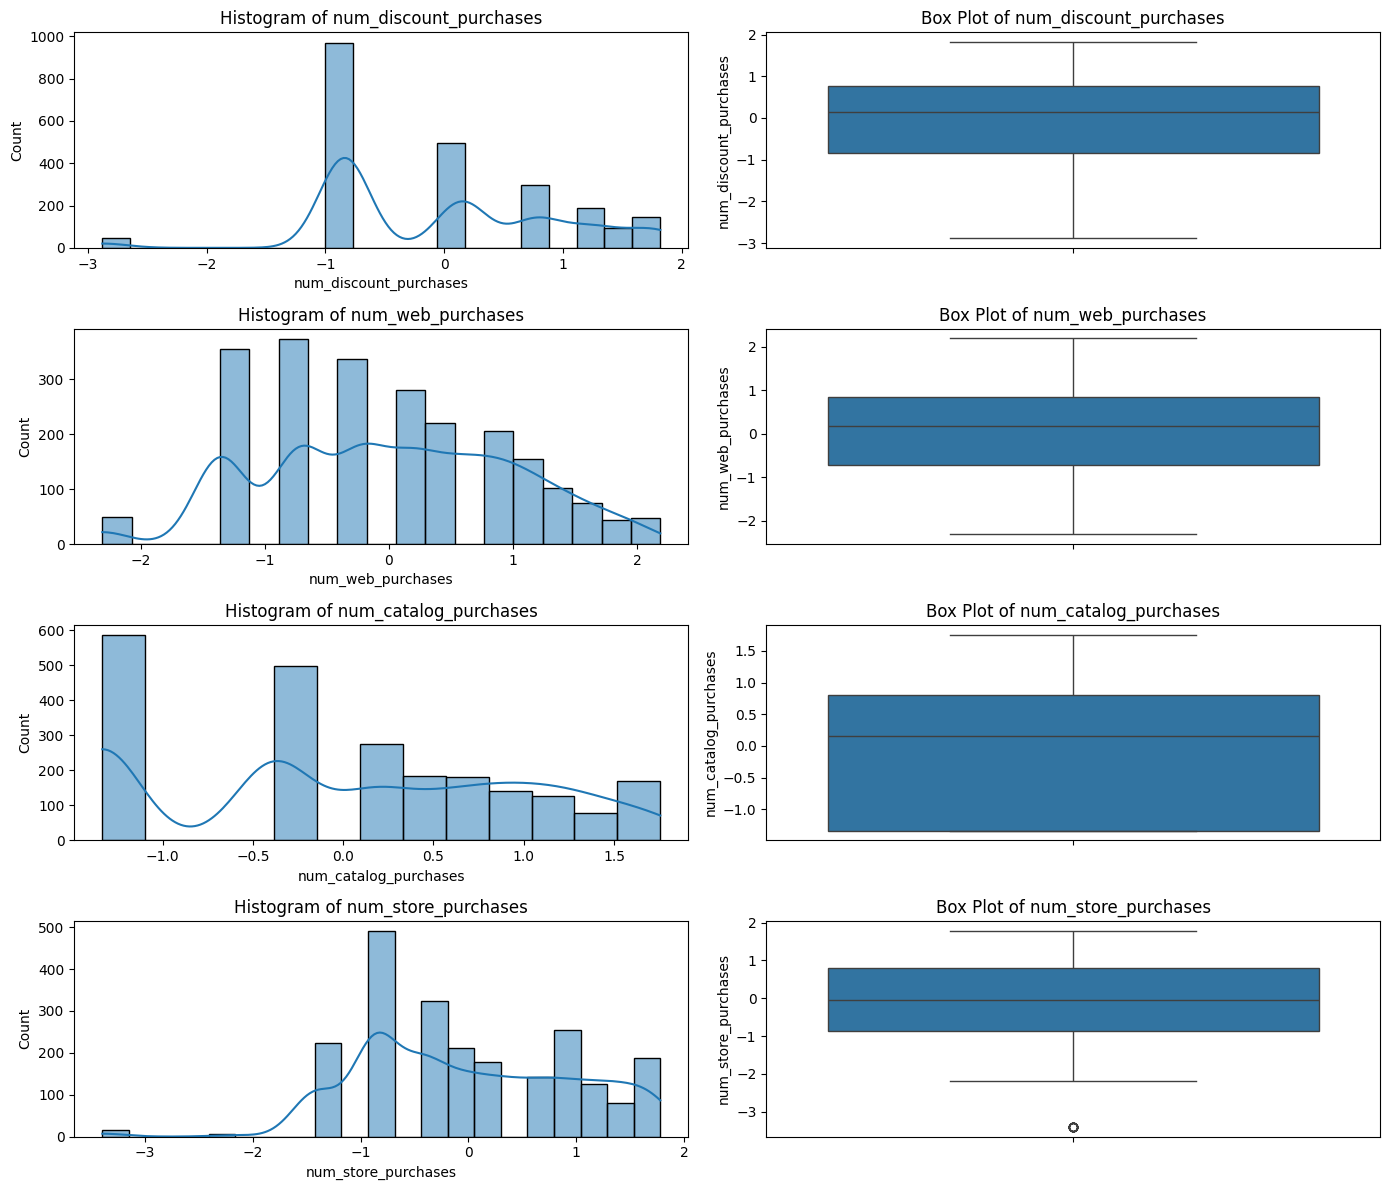

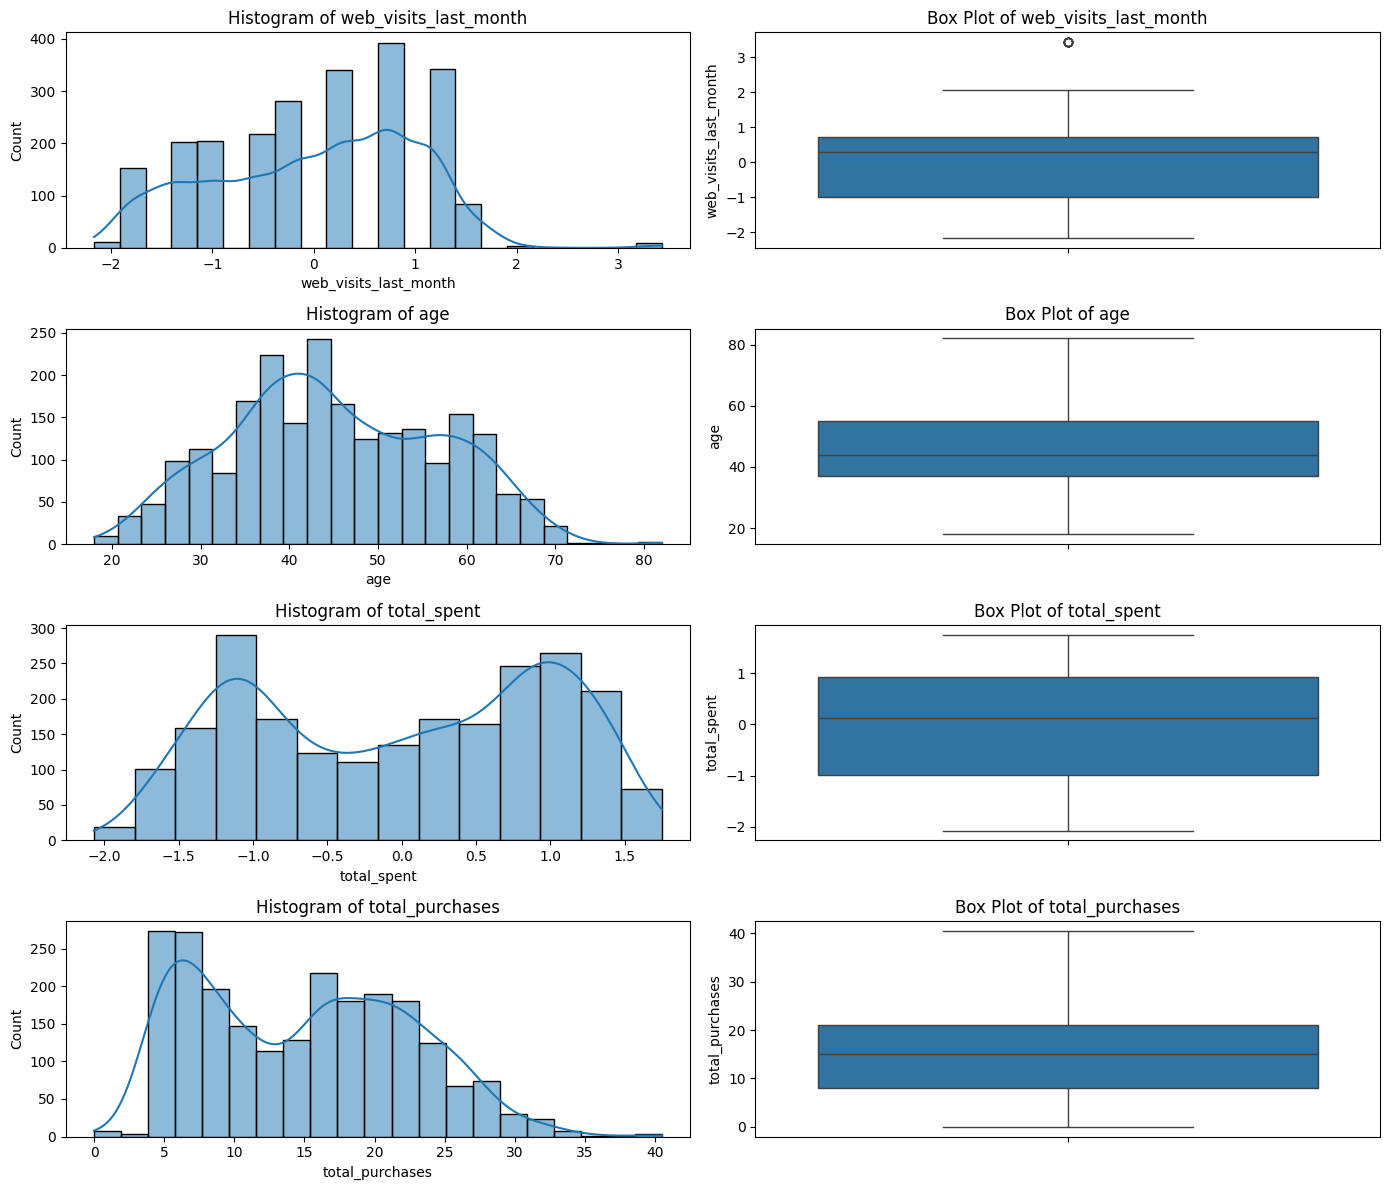

In [111]:
batch_size = 4  

for batch_start in range(0, len(num_cols.columns), batch_size):
    batch_cols = num_cols.columns[batch_start:batch_start + batch_size]

    plt.figure(figsize=(14, 3 * len(batch_cols)))

    for i, col in enumerate(batch_cols):
        plt.subplot(len(batch_cols), 2, 2*i + 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col}')

        plt.subplot(len(batch_cols), 2, 2*i + 2)
        sns.boxplot(y=df[col])
        plt.title(f'Box Plot of {col}')

    plt.tight_layout()
    plt.show()

## Clustering

### PCA

In [112]:
pca = PCA(n_components = 3)
pca.fit(df_scaled)
pca_cols = pd.DataFrame(pca.transform(df_scaled), columns=(["col1","col2", "col3"]))
pca_cols.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2240.0  7.295751e-17  2.513830 -5.571065 -2.323600  0.135903  2.393139   
col2  2240.0 -3.172066e-18  1.191362 -3.405964 -0.963162 -0.153910  0.812451   
col3  2240.0  4.242638e-17  0.858837 -3.479654 -0.554649 -0.000176  0.577897   

           max  
col1  4.524192  
col2  3.701935  
col3  3.031038

### Finding the best K

In [113]:
df.columns

Index(['education_level', 'annual_income', 'num_children', 'num_teenagers',
       'days_since_last_purchase', 'spend_wine', 'spend_fruits', 'spend_meat',
       'spend_fish', 'spend_sweets', 'spend_gold', 'num_discount_purchases',
       'num_web_purchases', 'num_catalog_purchases', 'num_store_purchases',
       'web_visits_last_month', 'total_accepted_campaigns', 'age',
       'signup_year', 'total_spent', 'total_purchases', 'family_size'],
      dtype='object')

In [114]:
ToVar = []
SilScore = []
StartK = 2
EndK = 15


for k in range(StartK, EndK):
    kmeanModel = KMeans(n_clusters=k, init="k-means++", n_init="auto", random_state=10)
    kmeanModel.fit(pca_cols)
    SilScore.append(silhouette_score(pca_cols, kmeanModel.labels_))
    ToVar.append(kmeanModel.inertia_)

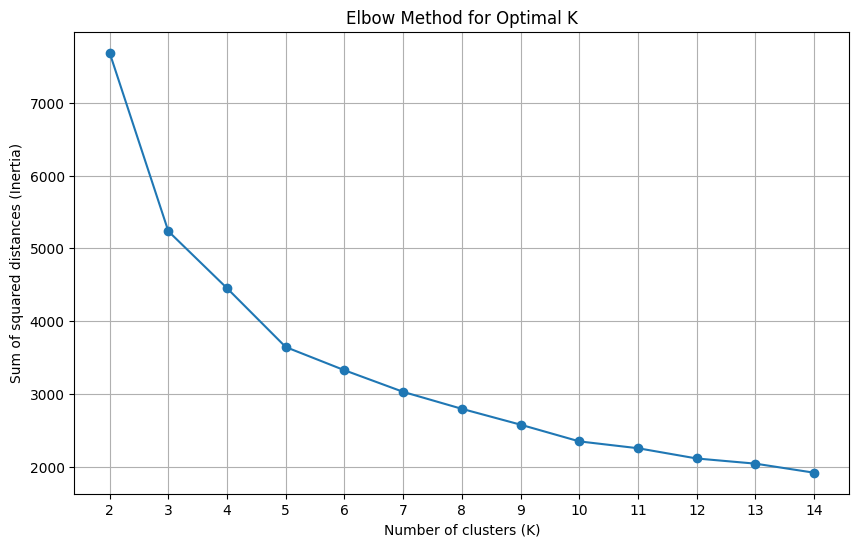

In [115]:
plt.figure(figsize=(10, 6))
plt.plot(range(StartK, EndK), ToVar, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared distances (Inertia)')
plt.xticks(range(StartK, EndK))
plt.grid(True)
plt.show()

In [116]:
LoopResult = pd.DataFrame(np.arange(StartK,EndK,1),columns=['K_Values'])
LoopResult['Silhouette_Score'] = SilScore
LoopResult['Var'] = ToVar
LoopResult

K_Values  Silhouette_Score          Var
0          2          0.499158  7686.025749
1          3          0.426615  5234.605781
2          4          0.374422  4452.051082
3          5          0.329662  3644.185300
4          6          0.323075  3326.031643
5          7          0.309870  3029.020177
6          8          0.308334  2795.892232
7          9          0.310545  2578.262756
8         10          0.302538  2348.901096
9         11          0.292426  2255.013660
10        12          0.271283  2114.228446
11        13          0.255966  2043.253315
12        14          0.265724  1918.734467

## Clustering with K=2




In [117]:
kmeans = KMeans(n_clusters=2, init="k-means++", n_init="auto", random_state=0)
df_scaled['clusters'] = kmeans.fit_predict(pca_cols)

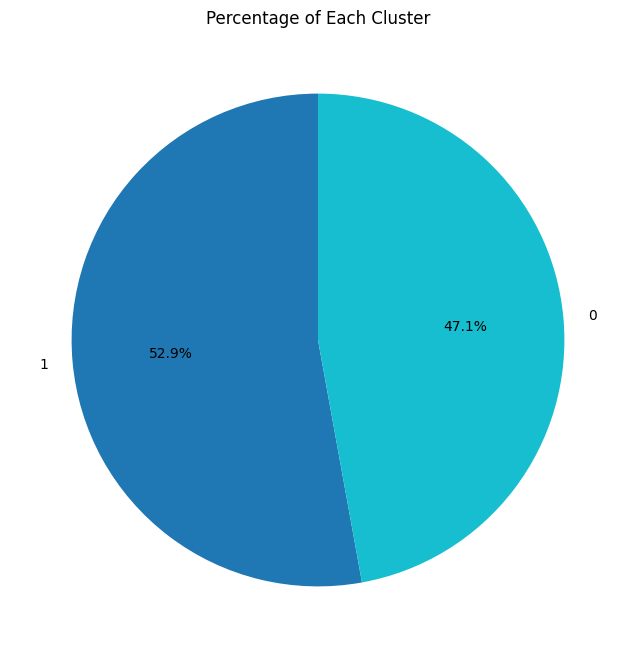

In [118]:
plt.figure(figsize=(8, 8))
df_scaled['clusters'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab10')
plt.title('Percentage of Each Cluster')
plt.ylabel('') 
plt.show()

## Analyze Cluster Profiles

Calculate the mean of each feature for every cluster to understand the distinct characteristics of each customer segment.


In [119]:
clustering_features = [
    'education_level', 'annual_income', 'num_children', 'num_teenagers',
    'days_since_last_purchase', 'web_visits_last_month', 'total_accepted_campaigns',
    'age', 'signup_year', 'total_spent', 'total_purchases', 'family_size'
]

cluster_profiles = df_scaled.groupby('clusters')[clustering_features].mean()
print("Cluster profiles:")
print(cluster_profiles)

Cluster profiles:
          education_level  annual_income  num_children  num_teenagers  \
clusters                                                                
0                0.333333        0.35955      0.766098       0.490530   
1                0.272382        0.61414      0.157095       0.501689   

          days_since_last_purchase  web_visits_last_month  \
clusters                                                    
0                         0.498077               0.470166   
1                         0.494250               0.313029   

          total_accepted_campaigns       age  signup_year  total_spent  \
clusters                                                                 
0                         0.154356  0.394132     0.568655     0.299858   
1                         0.376689  0.450987     0.465372     0.757691   

          total_purchases  family_size  
clusters                                
0                0.204920     0.477273  
1                0.51136

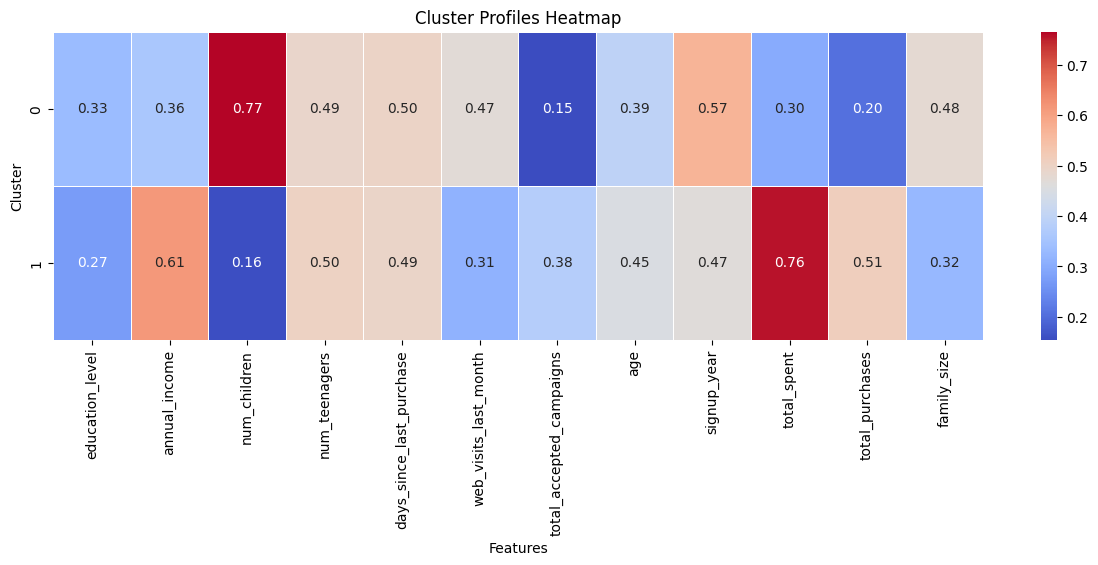

In [120]:
plt.figure(figsize=(15, 4))
sns.heatmap(cluster_profiles, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Cluster Profiles Heatmap')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.show()

### Data Analysis Key Findings

* Cluster 0 showed higher average spending on fruits and sweets.
* Cluster 1 had generally lower spending but higher average age and number of children.
* Cluster 2 had higher average spending.

## DBSCAN Clustering

Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a clustering algorithm that groups together points that are closely packed together, marking points in low-density regions as outliers.

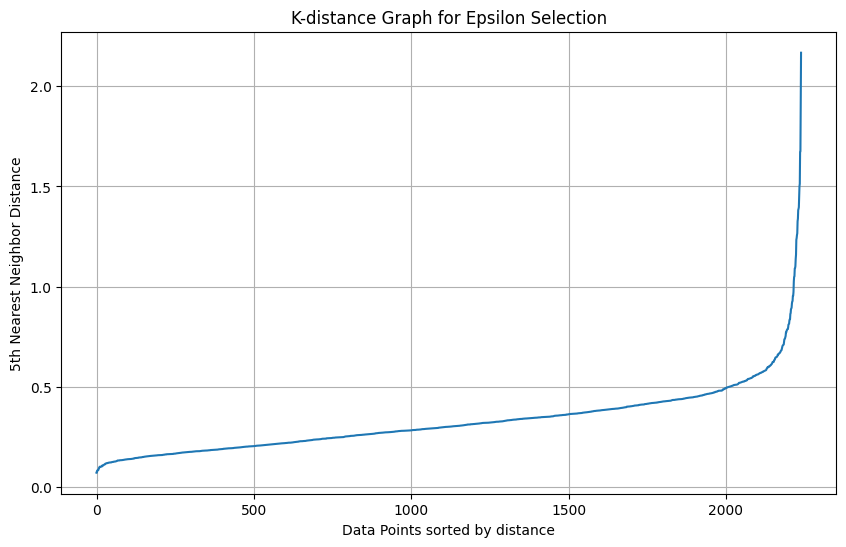

Look for the 'elbow' point in the graph to determine optimal epsilon


In [121]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(pca_cols)
distances, indices = neighbors_fit.kneighbors(pca_cols)

distances = np.sort(distances[:, -1], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Data Points sorted by distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.title('K-distance Graph for Epsilon Selection')
plt.grid(True)
plt.show()

print("Look for the 'elbow' point in the graph to determine optimal epsilon")

In [122]:
def predict_dbscan_silhouette(data, eps_range, min_samples_range):
    results = []
    
    data_array = data.values if hasattr(data, 'values') else np.array(data)
    
    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan_model.fit_predict(data_array)
            
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise = list(labels).count(-1)
            
            if n_clusters >= 2 and n_noise < len(labels):
                mask = labels != -1
                if sum(mask) > 1:
                    score = silhouette_score(data_array[mask], labels[mask])
                else:
                    score = -1
            else:
                score = -1  
            
            results.append({
                'eps': eps,
                'min_samples': min_samples,
                'silhouette_score': score,
                'n_clusters': n_clusters,
                'n_noise': n_noise,
                'noise_ratio': n_noise / len(labels)
            })
    
    results_df = pd.DataFrame(results)
    return results_df

eps_values = np.arange(0.5, 1.0, 0.1)
min_samples_values = [5, 10, 15, 20]

dbscan_results = predict_dbscan_silhouette(pca_cols, eps_values, min_samples_values)

print("DBSCAN Parameter Tuning Results:")
print(dbscan_results.sort_values('silhouette_score', ascending=False).head(10))

best_params = dbscan_results.loc[dbscan_results['silhouette_score'].idxmax()]
print(f"\nBest Parameters:")
print(f"  eps: {best_params['eps']:.2f}")
print(f"  min_samples: {int(best_params['min_samples'])}")
print(f"  Silhouette Score: {best_params['silhouette_score']:.4f}")
print(f"  Number of Clusters: {int(best_params['n_clusters'])}")
print(f"  Noise Points: {int(best_params['n_noise'])} ({best_params['noise_ratio']:.1%})")

best_dbscan = DBSCAN(eps=best_params['eps'], min_samples=int(best_params['min_samples']))
df_scaled['dbscan_clusters'] = best_dbscan.fit_predict(pca_cols)

n_clusters = int(best_params['n_clusters'])
n_noise = int(best_params['n_noise'])

print(f"\n✅ Labels stored in df_scaled['dbscan_clusters']")
print(f"   Cluster distribution:")
print(df_scaled['dbscan_clusters'].value_counts().sort_index())

DBSCAN Parameter Tuning Results:
    eps  min_samples  silhouette_score  n_clusters  n_noise  noise_ratio
3   0.5           20          0.545371           4      961     0.429018
15  0.8           20          0.191780           2       77     0.034375
10  0.7           15          0.190766           2      101     0.045089
19  0.9           20          0.190372           2       42     0.018750
9   0.7           10          0.188895           2       57     0.025446
12  0.8            5          0.188864           2       26     0.011607
13  0.8           10          0.188759           2       36     0.016071
14  0.8           15          0.188683           2       51     0.022768
18  0.9           15          0.188372           2       28     0.012500
17  0.9           10          0.188317           2       24     0.010714

Best Parameters:
  eps: 0.50
  min_samples: 20
  Silhouette Score: 0.5454
  Number of Clusters: 4
  Noise Points: 961 (42.9%)

✅ Labels stored in df_scaled['dbscan

##DBSCAN VS KMeans

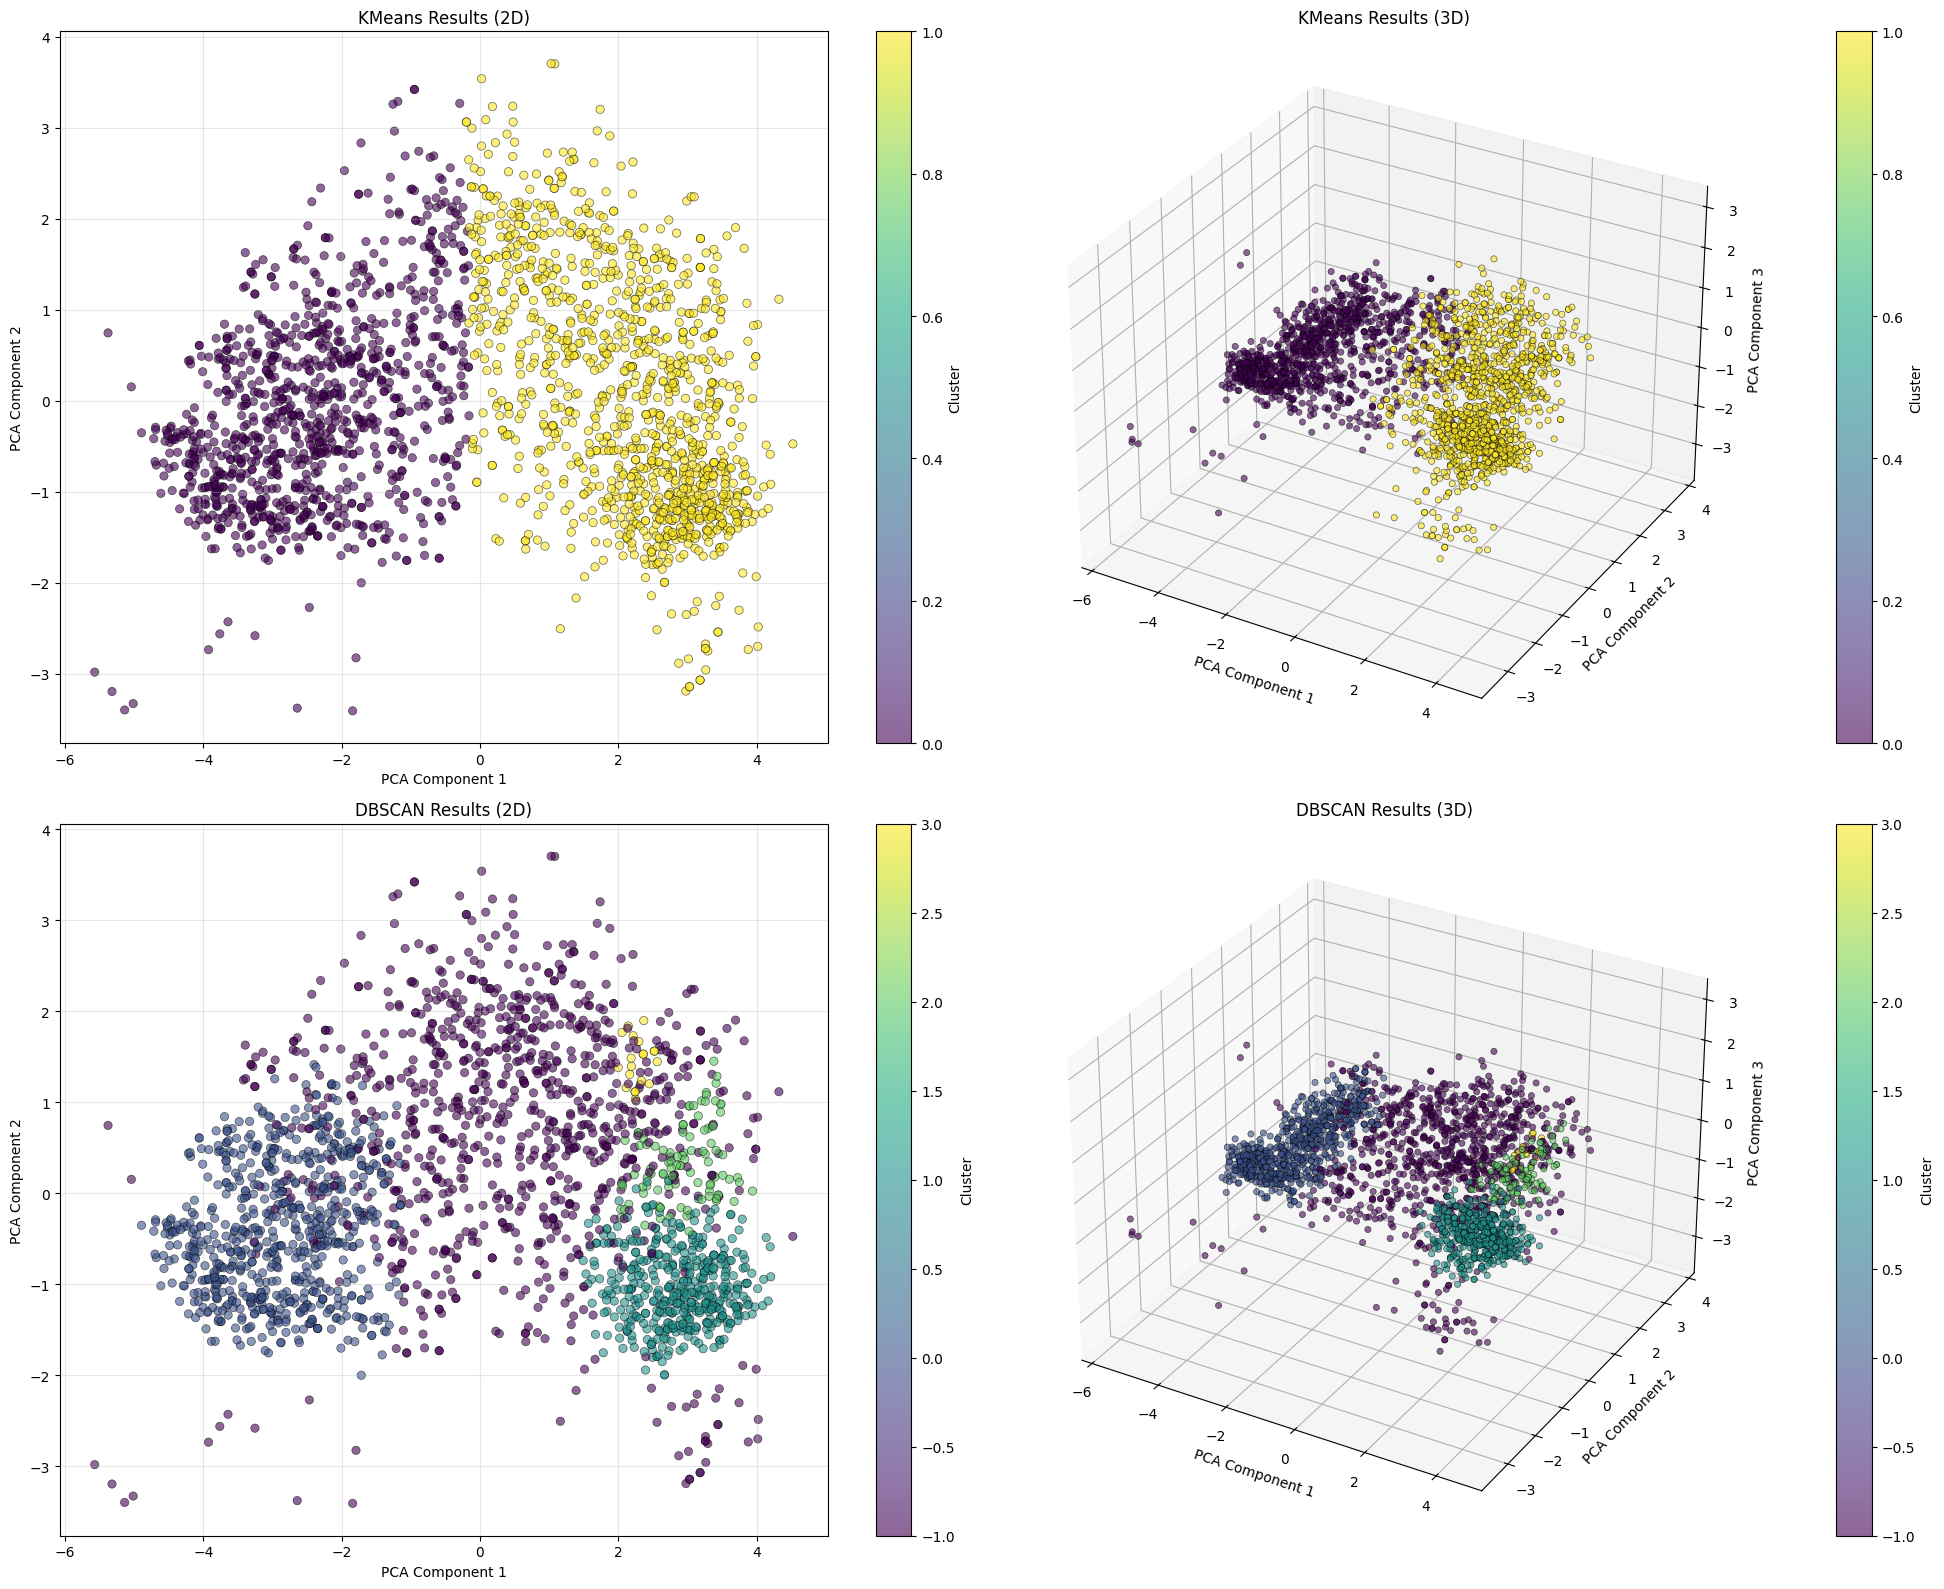

In [123]:

fig = plt.figure(figsize=(20, 16))

ax1 = fig.add_subplot(2, 2, 1)
scatter1 = ax1.scatter(pca_cols['col1'], pca_cols['col2'],
                       c=df_scaled['clusters'],
                       cmap='viridis',
                       alpha=0.6,
                       edgecolors='black',
                       linewidth=0.5)
ax1.set_xlabel('PCA Component 1')
ax1.set_ylabel('PCA Component 2')
ax1.set_title('KMeans Results (2D)')
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=ax1, label='Cluster')

# Plot 2: KMeans 3D (Top Right)
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
scatter2 = ax2.scatter(pca_cols['col1'], pca_cols['col2'], pca_cols['col3'],
    c=df_scaled['clusters'],
    cmap='viridis',
    alpha=0.6,
    edgecolors='black',
    linewidth=0.5)
ax2.set_xlabel('PCA Component 1')
ax2.set_ylabel('PCA Component 2')
ax2.set_zlabel('PCA Component 3')
ax2.set_title('KMeans Results (3D)')
plt.colorbar(scatter2, ax=ax2, label='Cluster', pad=0.1)

# --- Row 2: DBSCAN ---

# Plot 3: DBSCAN 2D (Bottom Left)
ax3 = fig.add_subplot(2, 2, 3)
scatter3 = ax3.scatter(pca_cols['col1'], pca_cols['col2'],
    c=df_scaled['dbscan_clusters'],
    cmap='viridis',
    alpha=0.6,
    edgecolors='black',
    linewidth=0.5)
ax3.set_xlabel('PCA Component 1')
ax3.set_ylabel('PCA Component 2')
ax3.set_title('DBSCAN Results (2D)')
ax3.grid(True, alpha=0.3)
plt.colorbar(scatter3, ax=ax3, label='Cluster')

# Plot 4: DBSCAN 3D (Bottom Right)
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
scatter4 = ax4.scatter(pca_cols['col1'], pca_cols['col2'], pca_cols['col3'],
    c=df_scaled['dbscan_clusters'],
    cmap='viridis',
    alpha=0.6,
    edgecolors='black',
    linewidth=0.5)
ax4.set_xlabel('PCA Component 1')
ax4.set_ylabel('PCA Component 2')
ax4.set_zlabel('PCA Component 3')
ax4.set_title('DBSCAN Results (3D)')
plt.colorbar(scatter4, ax=ax4, label='Cluster', pad=0.1)

plt.tight_layout()
plt.show()

DBSCAN Cluster Profiles (excluding noise):
                 education_level  annual_income  num_children  num_teenagers  \
dbscan_clusters                                                                
0                       0.337762       0.327447      0.861538       0.400000   
1                       0.264574       0.692961      0.015695       0.096413   
2                       0.193878       0.616702      0.112245       0.775510   
3                       0.225000       0.579423      0.050000       0.950000   

                 days_since_last_purchase  web_visits_last_month  \
dbscan_clusters                                                    
0                                0.490584               0.471934   
1                                0.492504               0.183980   
2                                0.522160               0.332429   
3                                0.504040               0.419791   

                 total_accepted_campaigns       age  signup_year  t

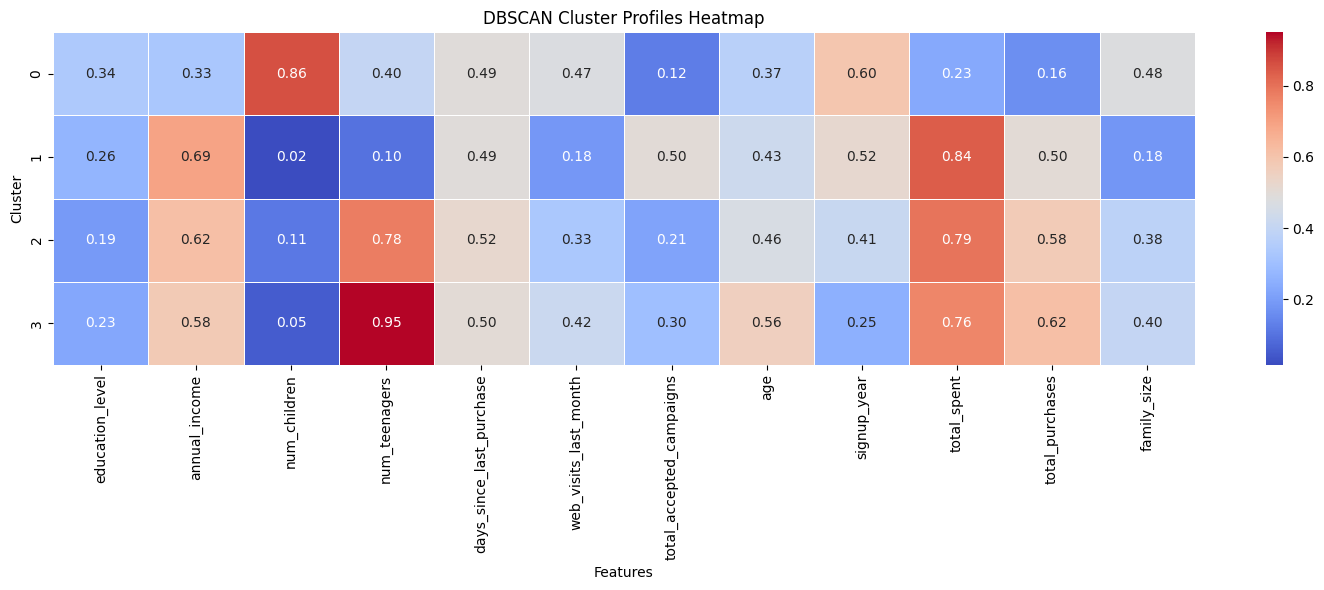

In [124]:
if n_clusters > 0:
    clustered_data = df_scaled[df_scaled['dbscan_clusters'] != -1]

    dbscan_profiles = clustered_data.groupby('dbscan_clusters')[clustering_features].mean()

    print("DBSCAN Cluster Profiles (excluding noise):")
    print(dbscan_profiles)

    # Heatmap
    plt.figure(figsize=(15, 6))
    sns.heatmap(dbscan_profiles, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('DBSCAN Cluster Profiles Heatmap')
    plt.xlabel('Features')
    plt.ylabel('Cluster')
    plt.tight_layout()
    plt.show()
else:
    print("No clusters found. Try adjusting eps and min_samples parameters.")

## Spectral Clustering

Spectral Clustering uses the eigenvalues of a similarity matrix to perform dimensionality reduction before clustering. It's particularly effective for finding clusters that are not linearly separable and can identify complex cluster shapes.

K=2: Silhouette Score = 0.4977
K=3: Silhouette Score = 0.4286
K=4: Silhouette Score = 0.3928
K=5: Silhouette Score = 0.3382
K=6: Silhouette Score = 0.3235
K=7: Silhouette Score = 0.3124


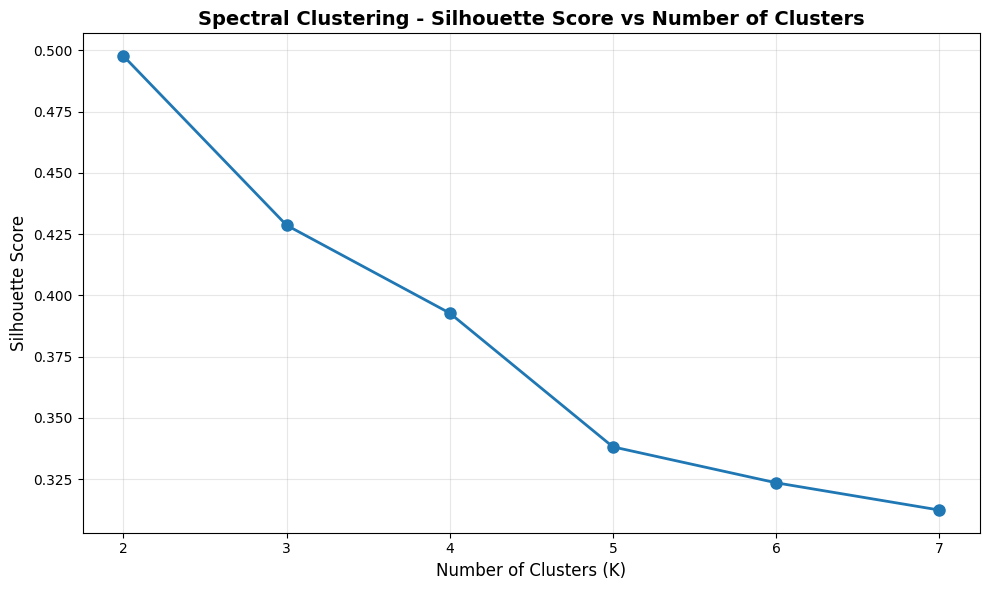


✅ Best K for Spectral Clustering: 2
   Best Silhouette Score: 0.4977


In [125]:
from sklearn.cluster import SpectralClustering

# Find optimal number of clusters for Spectral Clustering using silhouette score
spectral_silhouette_scores = []
k_range = range(2, 8)

for k in k_range:
    spectral = SpectralClustering(n_clusters=k, affinity='rbf', random_state=42, n_init=10)
    spectral_labels = spectral.fit_predict(pca_cols)
    score = silhouette_score(pca_cols, spectral_labels)
    spectral_silhouette_scores.append(score)
    print(f"K={k}: Silhouette Score = {score:.4f}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, spectral_silhouette_scores, marker='o', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Spectral Clustering - Silhouette Score vs Number of Clusters', fontsize=14, fontweight='bold')
plt.xticks(k_range)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Find best K
best_k_spectral = k_range[np.argmax(spectral_silhouette_scores)]
best_score_spectral = max(spectral_silhouette_scores)
print(f"\n✅ Best K for Spectral Clustering: {best_k_spectral}")
print(f"   Best Silhouette Score: {best_score_spectral:.4f}")

Spectral Clustering Results (K=2):
Cluster distribution:
spectral_clusters
0    1218
1    1022
Name: count, dtype: int64


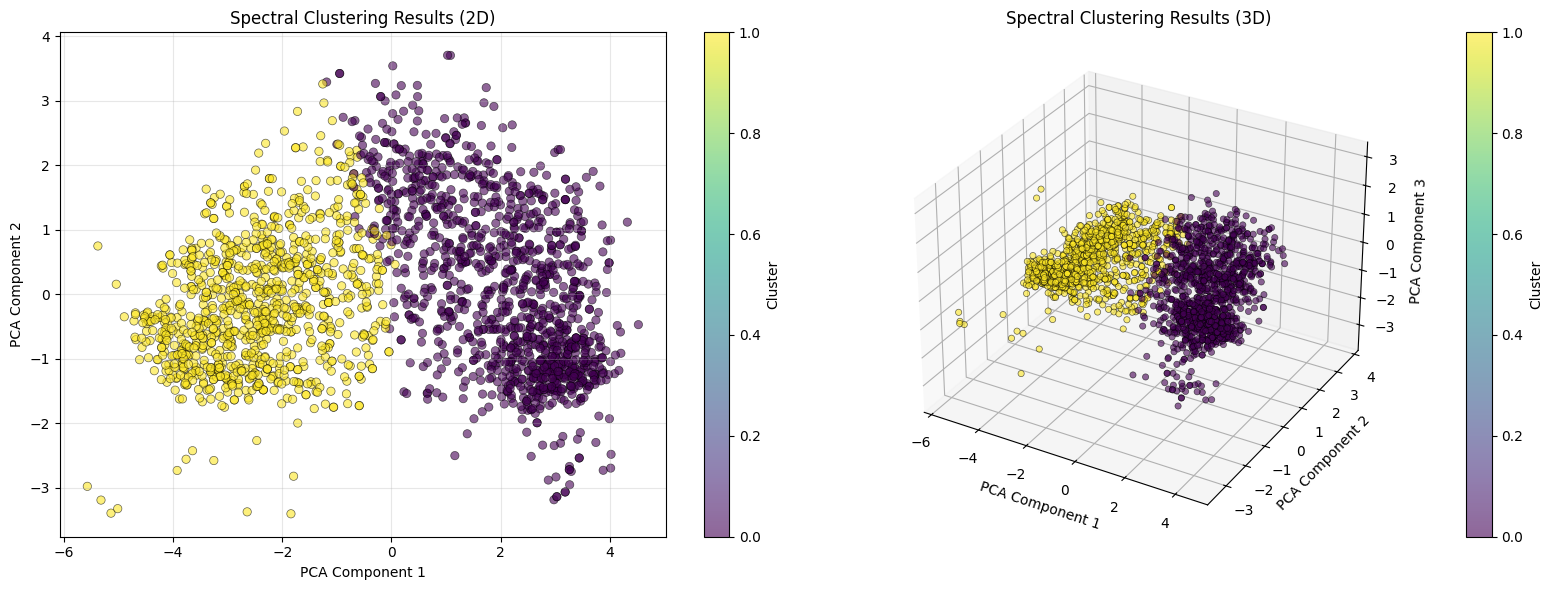


Spectral Clustering Profiles:
                   education_level  annual_income  num_children  \
spectral_clusters                                                 
0                         0.275862       0.610756      0.159278   
1                         0.331213       0.355114      0.783757   

                   num_teenagers  days_since_last_purchase  \
spectral_clusters                                            
0                       0.519704                  0.496981   
1                       0.468689                  0.494949   

                   web_visits_last_month  total_accepted_campaigns       age  \
spectral_clusters                                                              
0                               0.319577                  0.380952  0.452881   
1                               0.467591                  0.141879  0.389983   

                   signup_year  total_spent  total_purchases  family_size  
spectral_clusters                                     

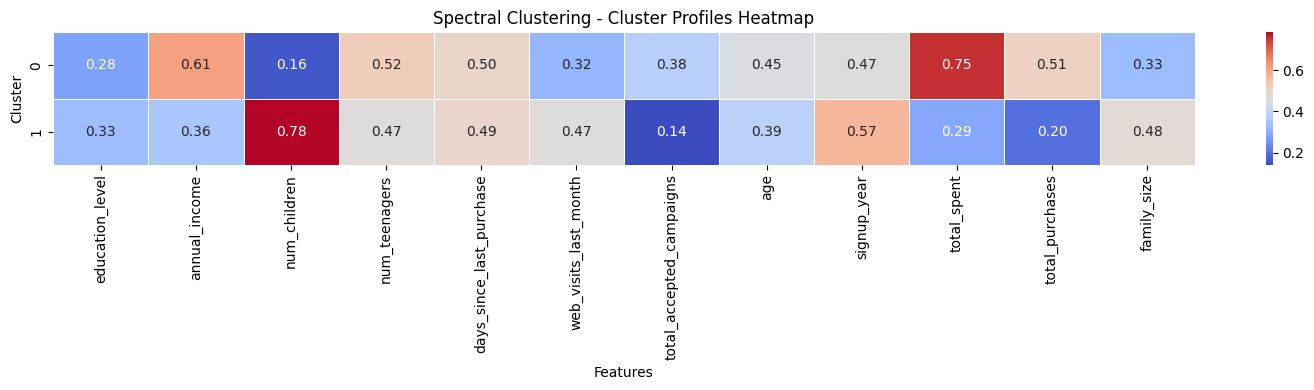

In [126]:
# Apply Spectral Clustering with best K
spectral_model = SpectralClustering(n_clusters=best_k_spectral, affinity='rbf', random_state=42, n_init=10)
df_scaled['spectral_clusters'] = spectral_model.fit_predict(pca_cols)

print(f"Spectral Clustering Results (K={best_k_spectral}):")
print(f"Cluster distribution:")
print(df_scaled['spectral_clusters'].value_counts().sort_index())

# Visualize Spectral Clustering results
fig = plt.figure(figsize=(16, 6))

# 2D Plot
ax1 = fig.add_subplot(1, 2, 1)
scatter1 = ax1.scatter(pca_cols['col1'], pca_cols['col2'],
    c=df_scaled['spectral_clusters'],
    cmap='viridis',
    alpha=0.6,
    edgecolors='black',
    linewidth=0.5)
ax1.set_xlabel('PCA Component 1')
ax1.set_ylabel('PCA Component 2')
ax1.set_title('Spectral Clustering Results (2D)')
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=ax1, label='Cluster')

# 3D Plot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
scatter2 = ax2.scatter(pca_cols['col1'], pca_cols['col2'], pca_cols['col3'],
    c=df_scaled['spectral_clusters'],
    cmap='viridis',
    alpha=0.6,
    edgecolors='black',
    linewidth=0.5)
ax2.set_xlabel('PCA Component 1')
ax2.set_ylabel('PCA Component 2')
ax2.set_zlabel('PCA Component 3')
ax2.set_title('Spectral Clustering Results (3D)')
plt.colorbar(scatter2, ax=ax2, label='Cluster', pad=0.1)

plt.tight_layout()
plt.show()

# Cluster Profiles for Spectral Clustering
spectral_profiles = df_scaled.groupby('spectral_clusters')[clustering_features].mean()
print("\nSpectral Clustering Profiles:")
print(spectral_profiles)

# Heatmap
plt.figure(figsize=(15, 4))
sns.heatmap(spectral_profiles, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Spectral Clustering - Cluster Profiles Heatmap')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.tight_layout()
plt.show()

In [127]:
df_scaled.head()

education_level  annual_income  num_children  num_teenagers  \
0              0.0       0.553381             0            0.0   
1              0.0       0.453996             1            1.0   
2              0.0       0.662562             0            0.0   
3              0.0       0.276494             1            0.0   
4              0.5       0.554661             1            0.0   

   days_since_last_purchase  spend_wine  spend_fruits  spend_meat  spend_fish  \
0                  0.585859    1.062784      1.487681    1.504406    1.493989   
1                  0.383838   -1.211545     -1.001121   -1.376502   -0.889143   
2                  0.262626    0.748918      1.145877    0.456428    1.435812   
3                  0.262626   -1.211545     -0.403311   -0.722233   -0.110828   
4                  0.949495    0.123712      1.058075    0.406278    0.832291   

   spend_sweets  ...  web_visits_last_month  total_accepted_campaigns  \
0      1.474200  ...               0.515871                       1.0   
1     -0.987648  ...               0.360876                       0.0   
2      0.579704  ...               0.285047                       0.0   
3     -0.542753  ...               0.437868                       0.0   
4      0.741799  ...               0.360876                       0.0   

        age  signup_year  total_spent  total_purchases  family_size  clusters  \
0  0.609375          0.0     0.886214         0.617284         0.00         1   
1  0.656250          1.0     0.164498         0.148148         0.50         0   
2  0.484375          0.5     0.714948         0.518519         0.25         1   
3  0.187500          1.0     0.249374         0.197531         0.50         0   
4  0.234375          1.0     0.588802         0.469136         0.50         1   

   dbscan_clusters  spectral_clusters  
0               -1                  0  
1                0                  1  
2                1                  0  
3                0                  1  
4               -1                  0  

[5 rows x 25 columns]

### Mapping for clusrting

### Spliting

In [128]:
df.head()

education_level  annual_income  num_children  num_teenagers  \
0                0       0.333964             0            0.0   
1                0      -0.226114             1            1.0   
2                0       0.949251             0            0.0   
3                0      -1.226416             1            0.0   
4                1       0.341179             1            0.0   

   days_since_last_purchase  spend_wine  spend_fruits  spend_meat  spend_fish  \
0                        58    1.062784      1.487681    1.504406    1.493989   
1                        38   -1.211545     -1.001121   -1.376502   -0.889143   
2                        26    0.748918      1.145877    0.456428    1.435812   
3                        26   -1.211545     -0.403311   -0.722233   -0.110828   
4                        94    0.123712      1.058075    0.406278    0.832291   

   spend_sweets  ...  num_web_purchases  num_catalog_purchases  \
0      1.474200  ...           1.358219               1.756826   
1     -0.987648  ...          -1.357883              -0.380498   
2      0.579704  ...           1.358219               0.154282   
3     -0.542753  ...          -0.720558              -1.335398   
4      0.741799  ...           0.525667               0.523444   

   num_store_purchases  web_visits_last_month  total_accepted_campaigns  age  \
0            -0.415926               0.720800                         1   57   
1            -1.418287              -0.146845                         0   60   
2             1.244092              -0.571328                         0   49   
3            -0.415926               0.284150                         0   30   
4             0.275211              -0.146845                         0   33   

   signup_year  total_spent  total_purchases  family_size  
0         2012     1.315365             25.0          1.0  
1         2014    -1.441417              6.0          3.0  
2         2013     0.661170             21.0          2.0  
3         2014    -1.117211              8.0          3.0  
4         2014     0.179322             19.0          3.0  

[5 rows x 22 columns]

In [129]:
print(df_scaled['clusters'].value_counts())

clusters
1    1184
0    1056
Name: count, dtype: int64


In [130]:
x = df.copy()
y = df_scaled['clusters']

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Scalling

In [132]:
x_train[cols_to_standardize]= scaler.fit_transform(x_train[cols_to_standardize])
x_test[cols_to_standardize]= scaler.transform(x_test[cols_to_standardize])

# Modeling

In [133]:
model_results = []

feature_importances = {}

In [134]:
def evaluate_model(model_name, model, x_train, y_train, x_test, y_test):
   
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    precision = precision_score(y_test, test_pred, average='macro')
    recall = recall_score(y_test, test_pred, average='macro')
    f1 = f1_score(y_test, test_pred, average='macro')
    cm = confusion_matrix(y_test, test_pred)
    
    # Display results
    print("=" * 60)
    print(f"📊 {model_name.upper()} - EVALUATION METRICS")
    print("=" * 60)
    print(f"Training Accuracy:  {100 * train_acc:.2f}%")
    print(f"Test Accuracy:      {100 * test_acc:.2f}%")
    print(f"Precision (Macro):  {100 * precision:.2f}%")
    print(f"Recall (Macro):     {100 * recall:.2f}%")
    print(f"F1 Score (Macro):   {100 * f1:.2f}%")
    print("=" * 60)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, test_pred))
    
    return {
        'Model': model_name,
        'Accuracy': test_acc,
        'Precision (Macro)': precision,
        'Recall (Macro)': recall,
        'F1 Score (Macro)': f1,
    }

print("✅ evaluate_model function created successfully!")

✅ evaluate_model function created successfully!


## Logistic Regression


📊 LOGISTIC REGRESSION - EVALUATION METRICS
Training Accuracy:  99.94%
Test Accuracy:      99.55%
Precision (Macro):  99.54%
Recall (Macro):     99.54%
F1 Score (Macro):   99.54%


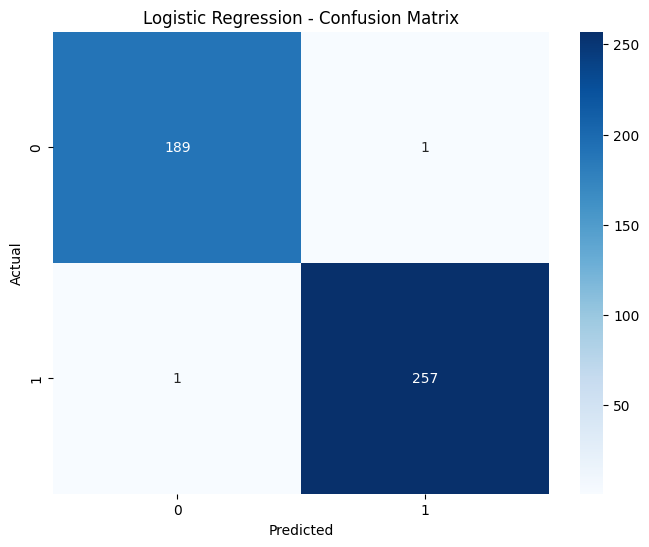


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       190
           1       1.00      1.00      1.00       258

    accuracy                           1.00       448
   macro avg       1.00      1.00      1.00       448
weighted avg       1.00      1.00      1.00       448



In [135]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(x_train, y_train)
results = evaluate_model("Logistic Regression", lr_model, x_train, y_train, x_test, y_test)
model_results.append(results)


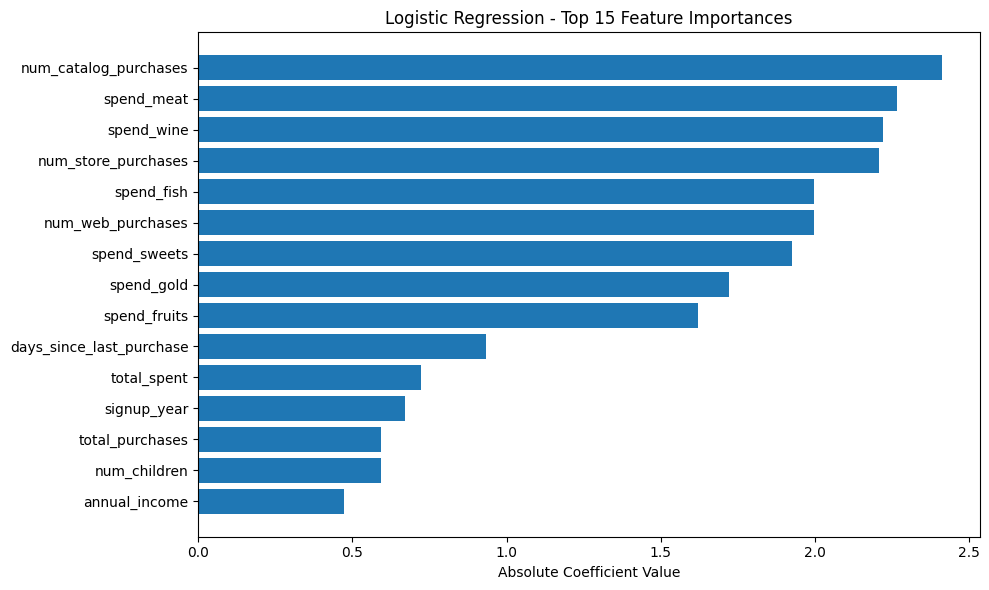


Top 10 Most Important Features:
                     Feature  Importance
13     num_catalog_purchases    2.413854
7                 spend_meat    2.265805
5                 spend_wine    2.220282
14       num_store_purchases    2.207641
8                 spend_fish    1.998710
12         num_web_purchases    1.998191
9               spend_sweets    1.924388
10                spend_gold    1.722542
6               spend_fruits    1.621737
4   days_since_last_purchase    0.932921


In [136]:
feature_names = x_train.columns
lr_importance = np.abs(lr_model.coef_[0])  
feature_importances['Logistic Regression'] = pd.DataFrame({
    'Feature': feature_names,
    'Importance': lr_importance
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
top_features = feature_importances['Logistic Regression'].head(15)
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Logistic Regression - Top 15 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importances['Logistic Regression'].head(10))

## Decision Tree

📊 DECISION TREE - EVALUATION METRICS
Training Accuracy:  100.00%
Test Accuracy:      94.87%
Precision (Macro):  94.77%
Recall (Macro):     94.71%
F1 Score (Macro):   94.74%


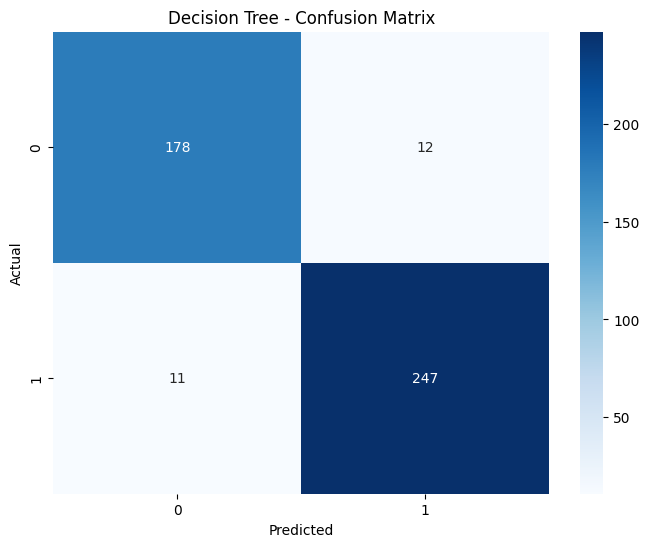


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       190
           1       0.95      0.96      0.96       258

    accuracy                           0.95       448
   macro avg       0.95      0.95      0.95       448
weighted avg       0.95      0.95      0.95       448



In [137]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
results = evaluate_model("Decision Tree", dt_model, x_train, y_train, x_test, y_test)
model_results.append(results)


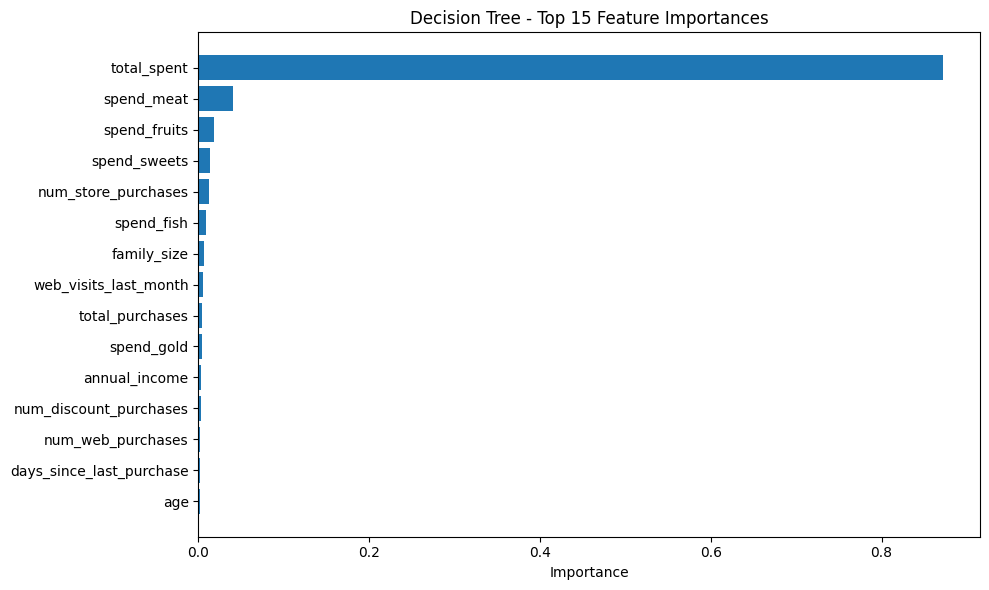


Top 10 Most Important Features:
                  Feature  Importance
19            total_spent    0.871672
7              spend_meat    0.040370
6            spend_fruits    0.018118
9            spend_sweets    0.013318
14    num_store_purchases    0.012992
8              spend_fish    0.008506
21            family_size    0.007081
15  web_visits_last_month    0.005607
20        total_purchases    0.004334
10             spend_gold    0.004232


In [138]:
dt_importance = dt_model.feature_importances_
feature_importances['Decision Tree'] = pd.DataFrame({
    'Feature': feature_names,
    'Importance': dt_importance
}).sort_values('Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 6))
top_features = feature_importances['Decision Tree'].head(15)
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.title('Decision Tree - Top 15 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importances['Decision Tree'].head(10))

### Grid Search for Decision Tree


In [139]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None]
}

dt_grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=dt_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
print("🔍 Starting Grid Search for Decision Tree...")
print("=" * 60)
dt_grid_search.fit(x_train, y_train)

# Best parameters and score
print("\n" + "=" * 60)
print("📊 GRID SEARCH RESULTS")
print("=" * 60)
print(f"\n✅ Best Parameters:")
for param, value in dt_grid_search.best_params_.items():
    print(f"   • {param}: {value}")
print(f"\n🎯 Best Cross-Validation Accuracy: {dt_grid_search.best_score_:.4f}")

# Create optimized model with best parameters
dt_model_optimized = dt_grid_search.best_estimator_

🔍 Starting Grid Search for Decision Tree...
Fitting 5 folds for each of 576 candidates, totalling 2880 fits

📊 GRID SEARCH RESULTS

✅ Best Parameters:
   • criterion: entropy
   • max_depth: 10
   • max_features: None
   • min_samples_leaf: 2
   • min_samples_split: 2

🎯 Best Cross-Validation Accuracy: 0.9788


In [140]:
print("📈 PERFORMANCE COMPARISON")
print("=" * 60)

y_pred_baseline = dt_model.predict(x_test)
baseline_acc = accuracy_score(y_test, y_pred_baseline)

y_pred_optimized = dt_model_optimized.predict(x_test)
optimized_acc = accuracy_score(y_test, y_pred_optimized)

print(f"\n🔹 Baseline Decision Tree Accuracy:  {baseline_acc:.4f}")
print(f"🔹 Optimized Decision Tree Accuracy: {optimized_acc:.4f}")
print(f"🔹 Improvement: {(optimized_acc - baseline_acc) * 100:+.2f}%")

print("\n" + "=" * 60)
print("📊 OPTIMIZED MODEL DETAILED METRICS")
print("=" * 60)
print(f"Precision: {precision_score(y_test, y_pred_optimized, average='macro'):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_optimized, average='macro'):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_optimized, average='macro'):.4f}")

📈 PERFORMANCE COMPARISON

🔹 Baseline Decision Tree Accuracy:  0.9487
🔹 Optimized Decision Tree Accuracy: 0.9665
🔹 Improvement: +1.79%

📊 OPTIMIZED MODEL DETAILED METRICS
Precision: 0.9660
Recall:    0.9654
F1 Score:  0.9657


### Information Gain Analysis for Decision Tree



Root Node Entropy: 0.9992

📊 INFORMATION GAIN FOR EACH FEATURE
                 Feature  Information Gain
             total_spent          0.826441
              spend_meat          0.061453
            spend_fruits          0.029913
              spend_fish          0.029848
            spend_sweets          0.016617
       num_web_purchases          0.010714
             family_size          0.008357
         total_purchases          0.004450
     num_store_purchases          0.004070
                     age          0.003613
  num_discount_purchases          0.003407
              spend_gold          0.001117
           annual_income          0.000000
         education_level          0.000000
              spend_wine          0.000000
days_since_last_purchase          0.000000
           num_teenagers          0.000000
            num_children          0.000000
   num_catalog_purchases          0.000000
   web_visits_last_month          0.000000
total_accepted_campaigns          

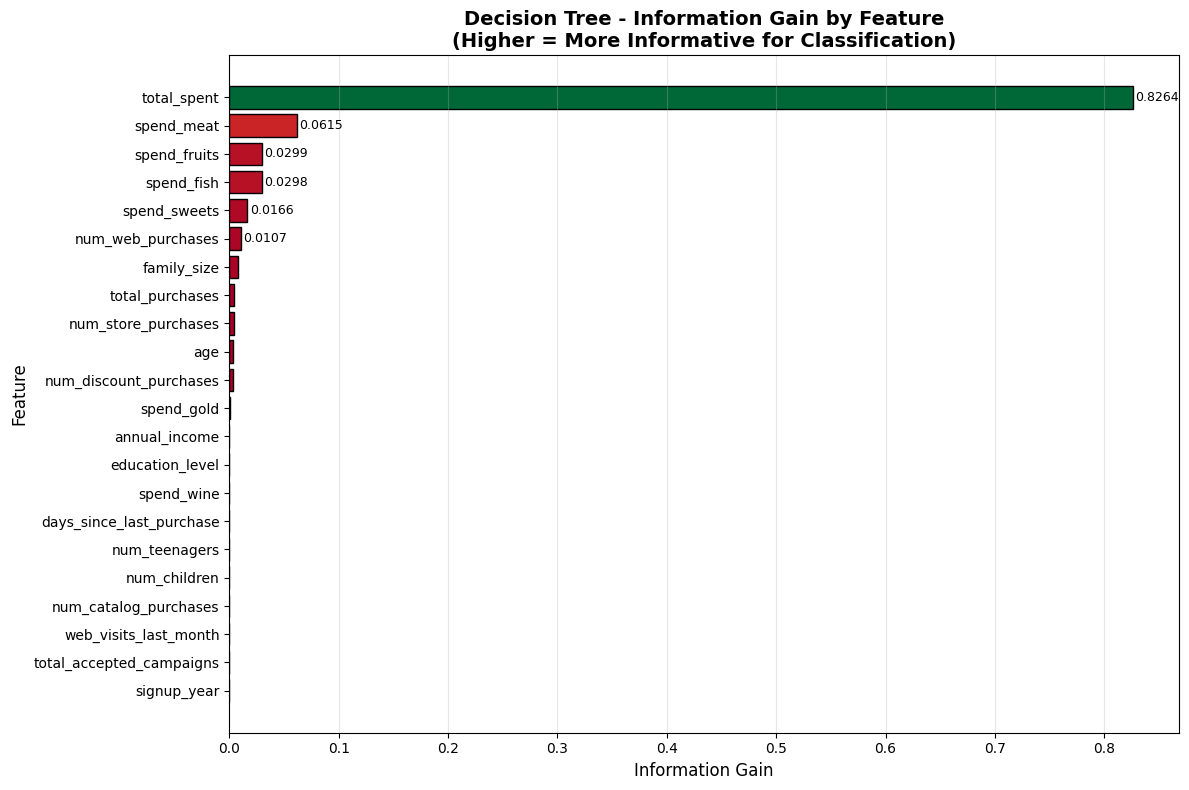


🌟 Most Informative Feature: total_spent
   Information Gain: 0.8264

📊 Features with zero Information Gain: 10
📊 Total Information Gain: 1.0000


In [141]:
dt_entropy_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy_model.fit(x_train, y_train)

def calculate_entropy(y):
    proportions = np.bincount(y) / len(y)
    proportions = proportions[proportions > 0]  # Remove zero proportio
    return -np.sum(proportions * np.log2(proportions))

root_entropy = calculate_entropy(y_train.values)
print(f"Root Node Entropy: {root_entropy:.4f}")

info_gain = dt_entropy_model.feature_importances_

info_gain_df = pd.DataFrame({
    'Feature': feature_names,
    'Information Gain': info_gain
}).sort_values('Information Gain', ascending=False)

print("\n" + "=" * 60)
print("📊 INFORMATION GAIN FOR EACH FEATURE")
print("=" * 60)
print(info_gain_df.to_string(index=False))
print("=" * 60)

# Visualize Information Gain
plt.figure(figsize=(12, 8))
colors = plt.cm.RdYlGn(info_gain_df['Information Gain'] / info_gain_df['Information Gain'].max())
bars = plt.barh(info_gain_df['Feature'], info_gain_df['Information Gain'], color=colors, edgecolor='black')
plt.xlabel('Information Gain', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Decision Tree - Information Gain by Feature\n(Higher = More Informative for Classification)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

# Add value labels on bars
for bar, val in zip(bars, info_gain_df['Information Gain']):
    if val > 0.01:
        plt.text(val + 0.002, bar.get_y() + bar.get_height()/2, f'{val:.4f}', 
         va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Summary statistics
print(f"\n🌟 Most Informative Feature: {info_gain_df.iloc[0]['Feature']}")
print(f"   Information Gain: {info_gain_df.iloc[0]['Information Gain']:.4f}")
print(f"\n📊 Features with zero Information Gain: {(info_gain_df['Information Gain'] == 0).sum()}")
print(f"📊 Total Information Gain: {info_gain_df['Information Gain'].sum():.4f}")

## Random Forest

📊 RANDOM FOREST - EVALUATION METRICS
Training Accuracy:  100.00%
Test Accuracy:      97.32%
Precision (Macro):  97.26%
Recall (Macro):     97.26%
F1 Score (Macro):   97.26%


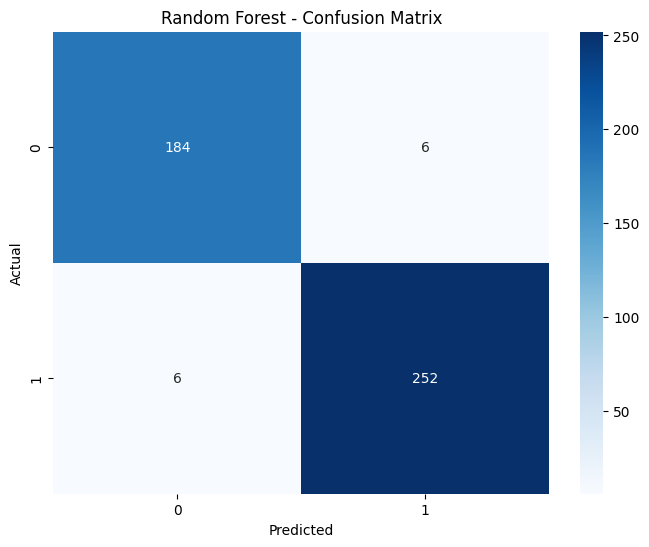


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       190
           1       0.98      0.98      0.98       258

    accuracy                           0.97       448
   macro avg       0.97      0.97      0.97       448
weighted avg       0.97      0.97      0.97       448



In [142]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
results = evaluate_model('Random Forest', rf_model, x_train, y_train, x_test, y_test)
model_results.append(results)


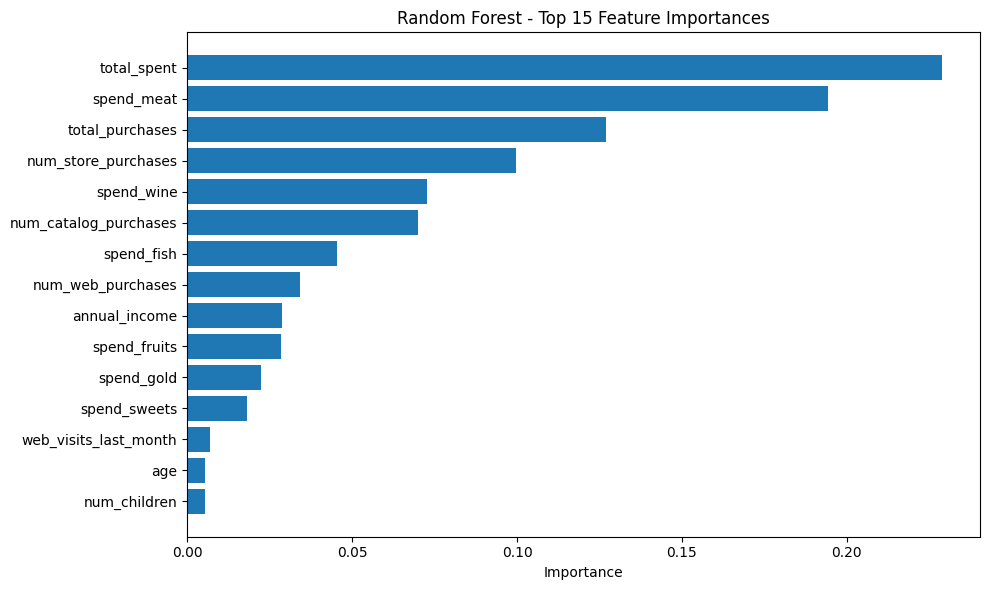


Top 10 Most Important Features:
                  Feature  Importance
19            total_spent    0.228925
7              spend_meat    0.194299
20        total_purchases    0.127036
14    num_store_purchases    0.099755
5              spend_wine    0.072623
13  num_catalog_purchases    0.069971
8              spend_fish    0.045454
12      num_web_purchases    0.034246
1           annual_income    0.028865
6            spend_fruits    0.028490


In [143]:
rf_importance = rf_model.feature_importances_
feature_importances['Random Forest'] = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_importance
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
top_features = feature_importances['Random Forest'].head(15)
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.title('Random Forest - Top 15 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importances['Random Forest'].head(10))

## K-Nearest Neighbors

📊 K-NEAREST NEIGHBORS - EVALUATION METRICS
Training Accuracy:  98.44%
Test Accuracy:      97.54%
Precision (Macro):  97.32%
Recall (Macro):     97.73%
F1 Score (Macro):   97.50%


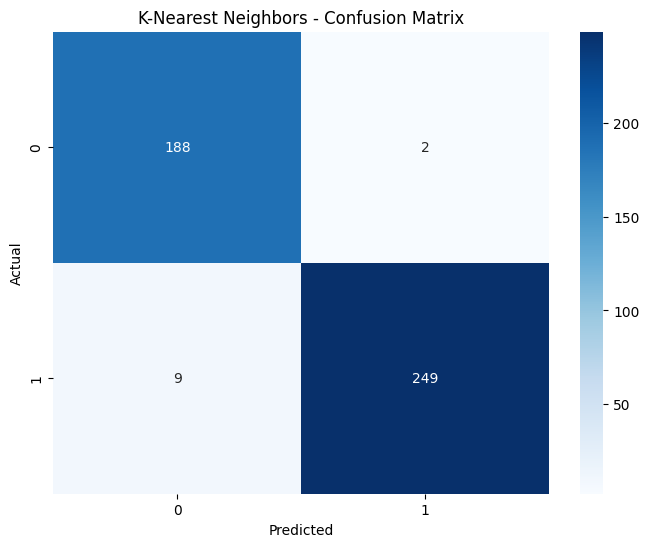


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       190
           1       0.99      0.97      0.98       258

    accuracy                           0.98       448
   macro avg       0.97      0.98      0.97       448
weighted avg       0.98      0.98      0.98       448



In [144]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
results = evaluate_model("K-Nearest Neighbors", knn_model, x_train, y_train, x_test, y_test)
model_results.append(results)


## Naive Bayes

📊 NAIVE BAYES - EVALUATION METRICS
Training Accuracy:  97.54%
Test Accuracy:      96.65%
Precision (Macro):  96.83%
Recall (Macro):     96.33%
F1 Score (Macro):   96.56%


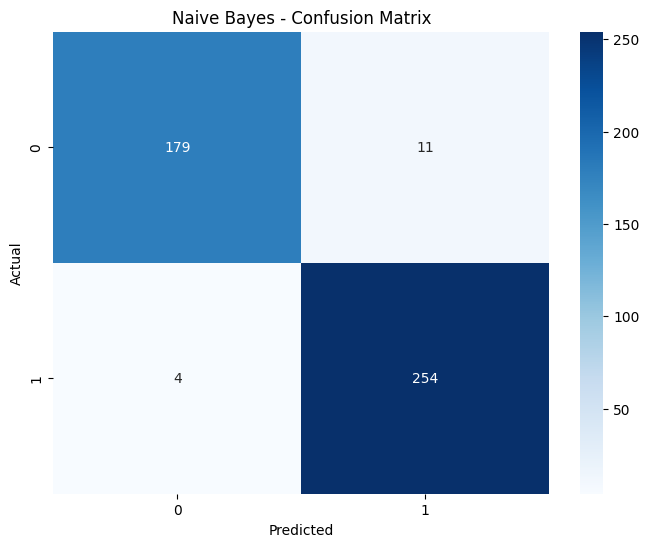


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       190
           1       0.96      0.98      0.97       258

    accuracy                           0.97       448
   macro avg       0.97      0.96      0.97       448
weighted avg       0.97      0.97      0.97       448



In [145]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
results = evaluate_model("Naive Bayes", nb_model, x_train, y_train, x_test, y_test)
model_results.append(results)


## XGBoost

📊 XGBOOST - EVALUATION METRICS
Training Accuracy:  100.00%
Test Accuracy:      98.44%
Precision (Macro):  98.37%
Recall (Macro):     98.44%
F1 Score (Macro):   98.40%


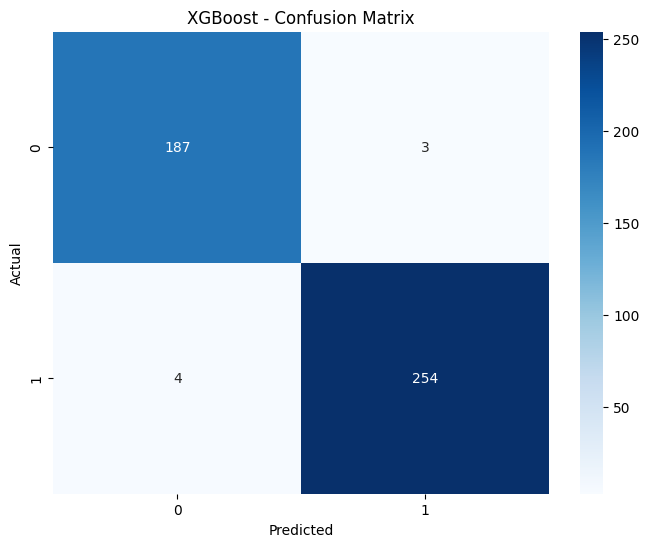


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       190
           1       0.99      0.98      0.99       258

    accuracy                           0.98       448
   macro avg       0.98      0.98      0.98       448
weighted avg       0.98      0.98      0.98       448



In [146]:
xgb_model = XGBClassifier(random_state=42, eval_metric='mlogloss')
xgb_model.fit(x_train, y_train)
results = evaluate_model("XGBoost", xgb_model, x_train, y_train, x_test, y_test)
model_results.append(results)


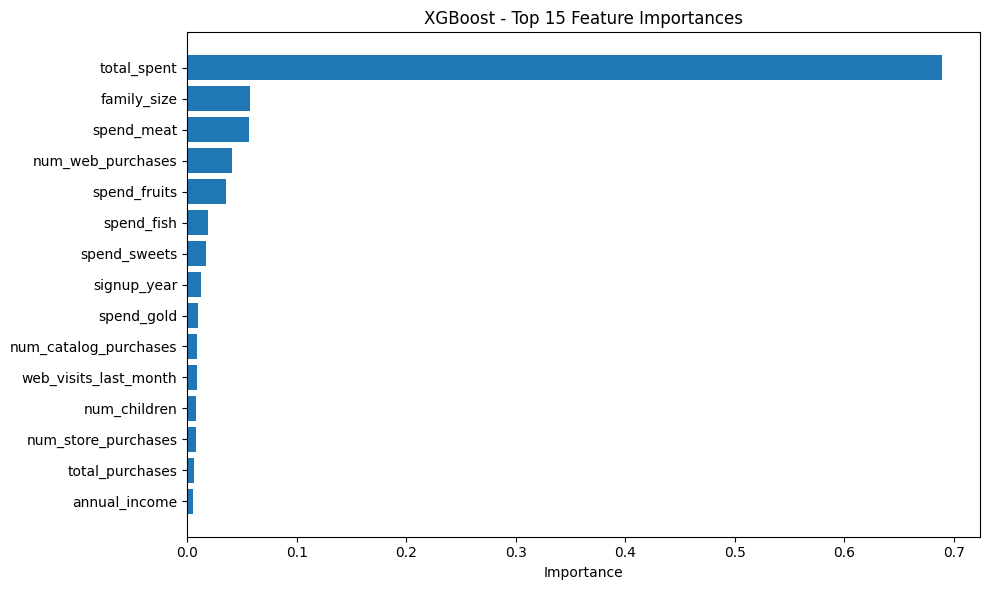


Top 10 Most Important Features:
                  Feature  Importance
19            total_spent    0.689611
21            family_size    0.057400
7              spend_meat    0.056611
12      num_web_purchases    0.041191
6            spend_fruits    0.035480
8              spend_fish    0.019413
9            spend_sweets    0.016883
18            signup_year    0.012204
10             spend_gold    0.009968
13  num_catalog_purchases    0.009360


In [147]:
xgb_importance = xgb_model.feature_importances_
feature_importances['XGBoost'] = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_importance
}).sort_values('Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 6))
top_features = feature_importances['XGBoost'].head(15)
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.title('XGBoost - Top 15 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importances['XGBoost'].head(10))

## Model Comparison

MODEL PERFORMANCE COMPARISON
              Model  Accuracy  Precision (Macro)  Recall (Macro)  F1 Score (Macro)
Logistic Regression    0.9955             0.9954          0.9954            0.9954
      Decision Tree    0.9487             0.9477          0.9471            0.9474
      Random Forest    0.9732             0.9726          0.9726            0.9726
K-Nearest Neighbors    0.9754             0.9732          0.9773            0.9750
        Naive Bayes    0.9665             0.9683          0.9633            0.9656
            XGBoost    0.9844             0.9837          0.9844            0.9840


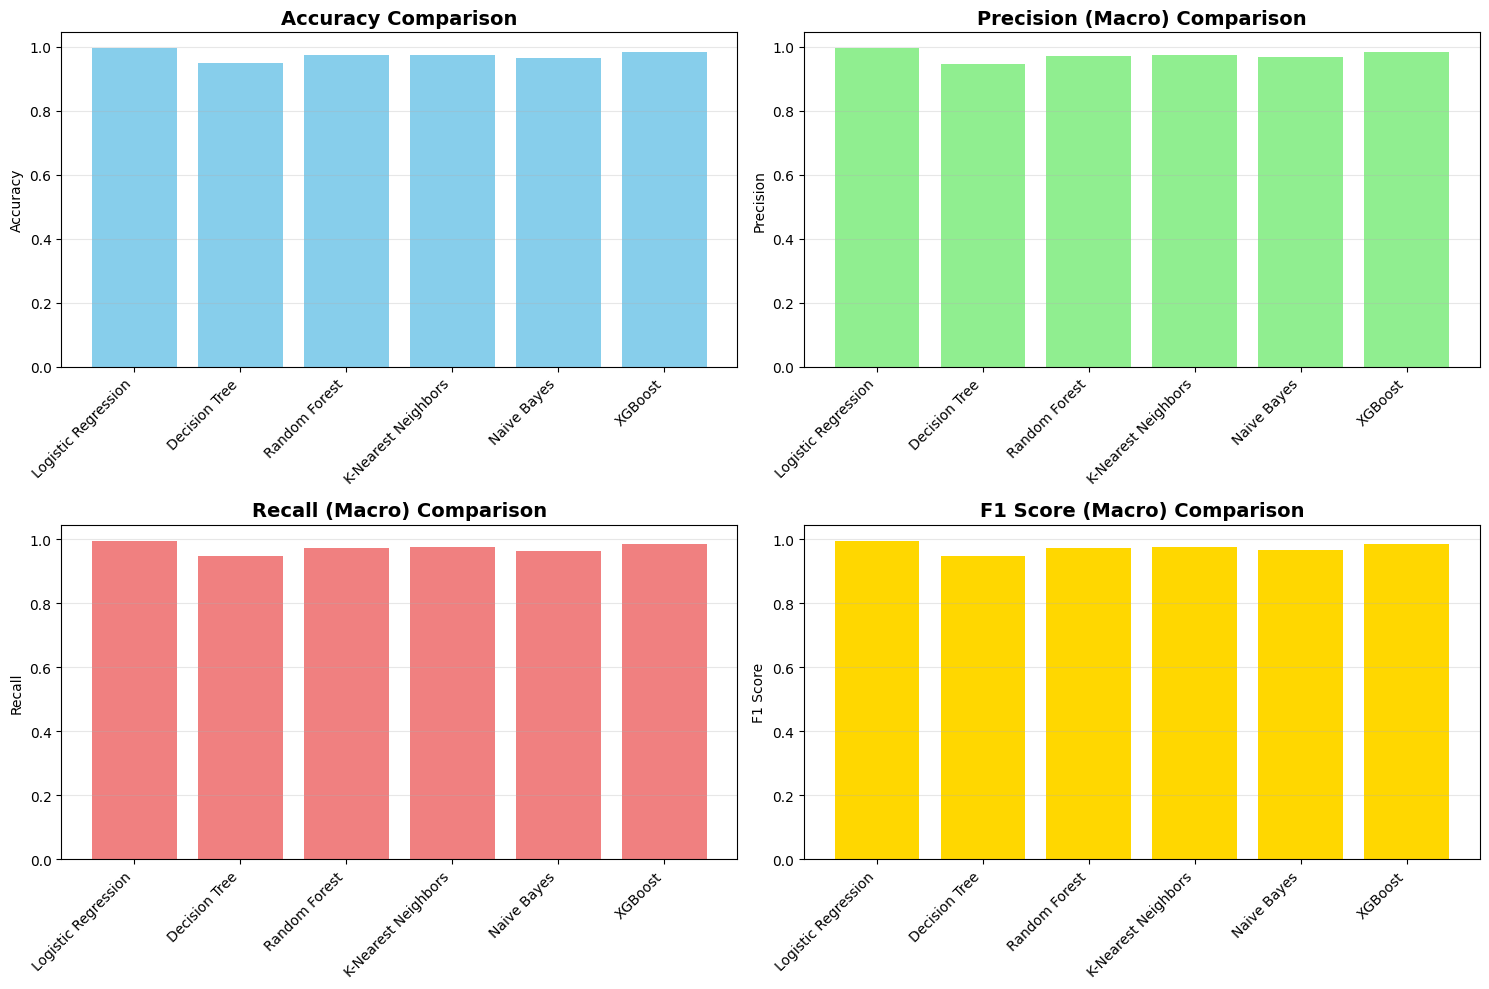


🏆 BEST MODEL: Logistic Regression
   Accuracy: 0.9955
   F1 Score: 0.9954


In [148]:
# Create comparison dataframe
results_df = pd.DataFrame(model_results)
results_df = results_df.round(4)

print("=" * 80)
print("MODEL PERFORMANCE COMPARISON")
print("=" * 80)
print(results_df.to_string(index=False))
print("=" * 80)

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Accuracy comparison
axes[0, 0].bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
axes[0, 0].set_title('Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[0, 0].grid(axis='y', alpha=0.3)

# Precision comparison
axes[0, 1].bar(results_df['Model'], results_df['Precision (Macro)'], color='lightgreen')
axes[0, 1].set_title('Precision (Macro) Comparison', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[0, 1].grid(axis='y', alpha=0.3)

# Recall comparison
axes[1, 0].bar(results_df['Model'], results_df['Recall (Macro)'], color='lightcoral')
axes[1, 0].set_title('Recall (Macro) Comparison', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Recall')
axes[1, 0].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[1, 0].grid(axis='y', alpha=0.3)

# F1 Score comparison
axes[1, 1].bar(results_df['Model'], results_df['F1 Score (Macro)'], color='gold')
axes[1, 1].set_title('F1 Score (Macro) Comparison', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('F1 Score')
axes[1, 1].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Find best model
best_model_idx = results_df['Accuracy'].idxmax()
print(f"\n🏆 BEST MODEL: {results_df.loc[best_model_idx, 'Model']}")
print(f"   Accuracy: {results_df.loc[best_model_idx, 'Accuracy']:.4f}")
print(f"   F1 Score: {results_df.loc[best_model_idx, 'F1 Score (Macro)']:.4f}")

## Feature Importance Comparison

TOP 10 FEATURES BY MODEL

Logistic Regression:
                 Feature  Importance
   num_catalog_purchases    2.413854
              spend_meat    2.265805
              spend_wine    2.220282
     num_store_purchases    2.207641
              spend_fish    1.998710
       num_web_purchases    1.998191
            spend_sweets    1.924388
              spend_gold    1.722542
            spend_fruits    1.621737
days_since_last_purchase    0.932921
--------------------------------------------------------------------------------

Decision Tree:
              Feature  Importance
          total_spent    0.871672
           spend_meat    0.040370
         spend_fruits    0.018118
         spend_sweets    0.013318
  num_store_purchases    0.012992
           spend_fish    0.008506
          family_size    0.007081
web_visits_last_month    0.005607
      total_purchases    0.004334
           spend_gold    0.004232
---------------------------------------------------------------------------

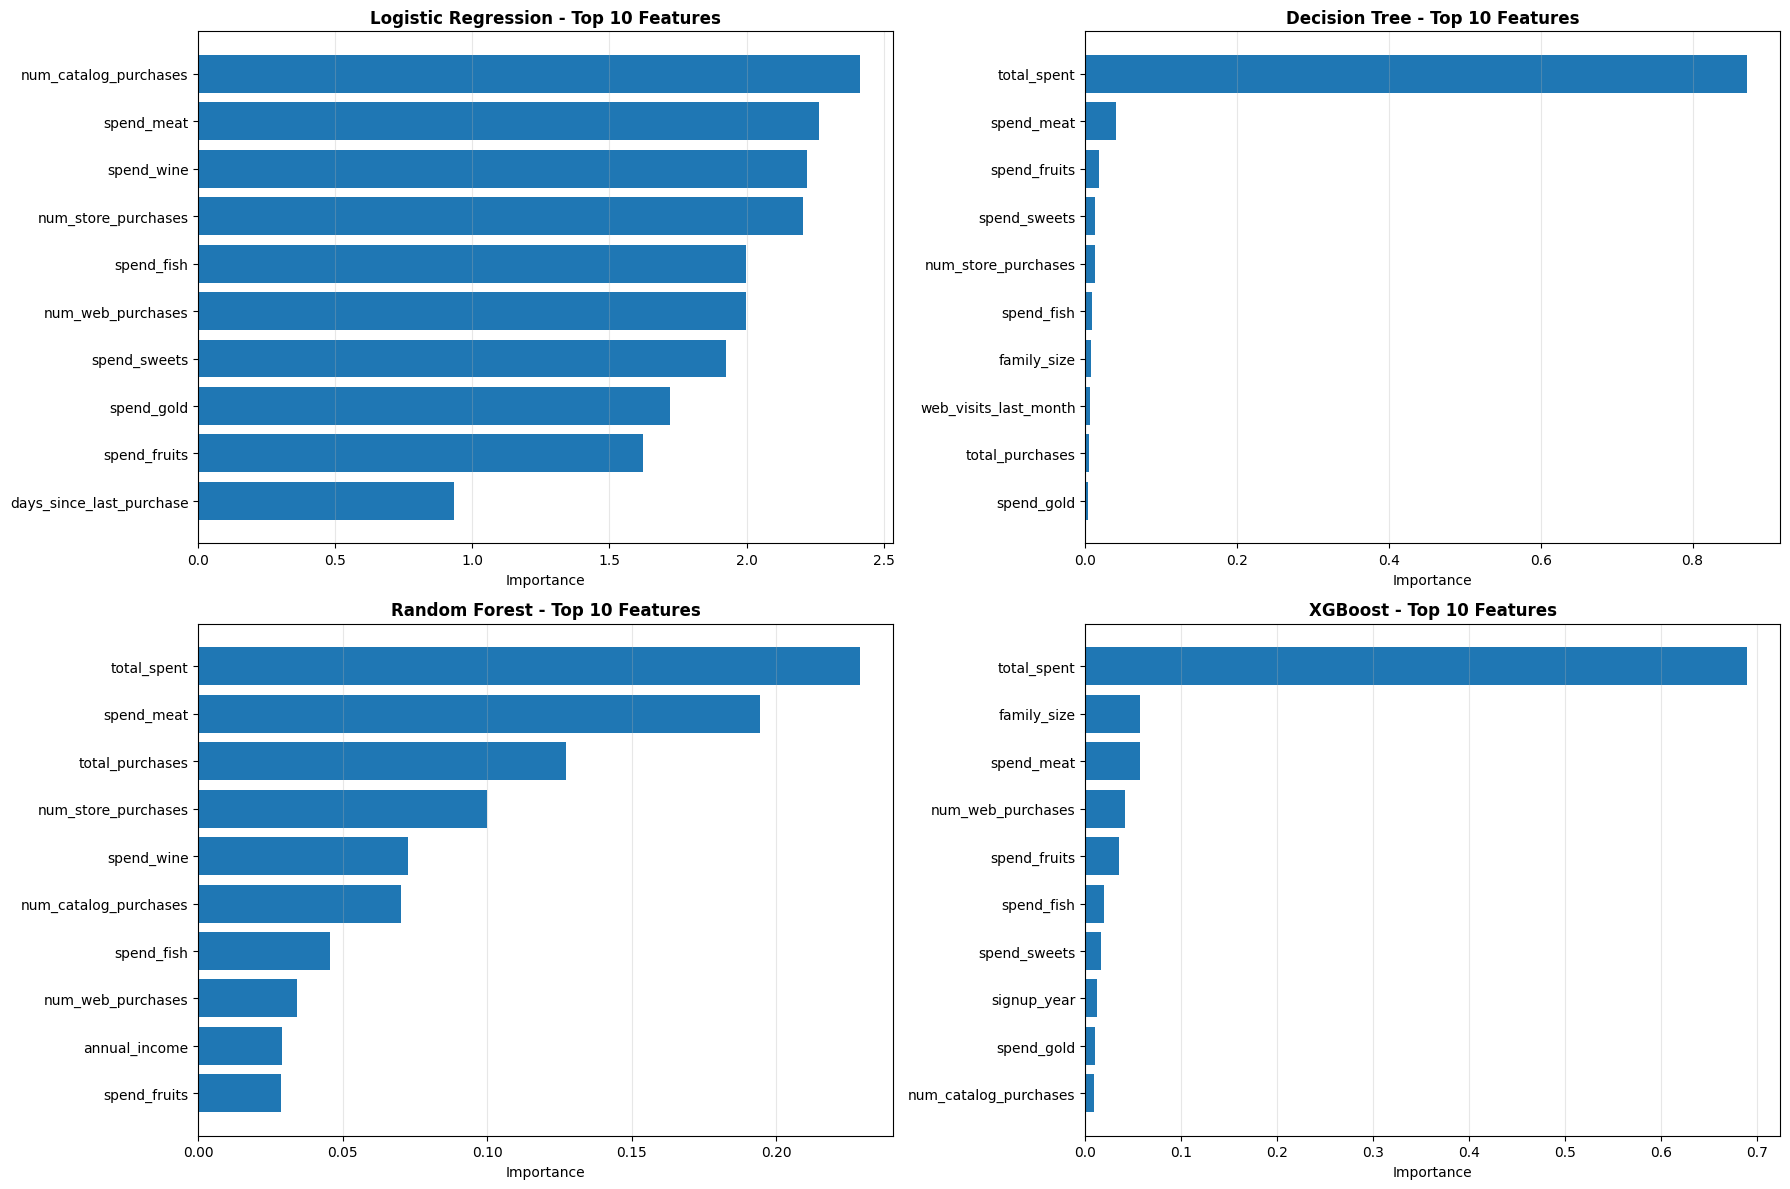

In [149]:
models_with_importance = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']

print("=" * 80)
print("TOP 10 FEATURES BY MODEL")
print("=" * 80)

for model_name in models_with_importance:
    if model_name in feature_importances:
        print(f"\n{model_name}:")
        print(feature_importances[model_name].head(10).to_string(index=False))
        print("-" * 80)

# Compare top features across models
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for idx, model_name in enumerate(models_with_importance):
    if model_name in feature_importances:
        top_10 = feature_importances[model_name].head(10)
        axes[idx].barh(top_10['Feature'], top_10['Importance'])
        axes[idx].set_title(f'{model_name} - Top 10 Features', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Importance')
        axes[idx].invert_yaxis()
        axes[idx].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


FEATURE CONSENSUS ANALYSIS
Features appearing in top 5 across multiple models:
              Feature  Models Count
           spend_meat             4
          total_spent             3
  num_store_purchases             3
         spend_fruits             2
           spend_wine             2
         spend_sweets             1
      total_purchases             1
num_catalog_purchases             1
          family_size             1
    num_web_purchases             1
           spend_fish             1


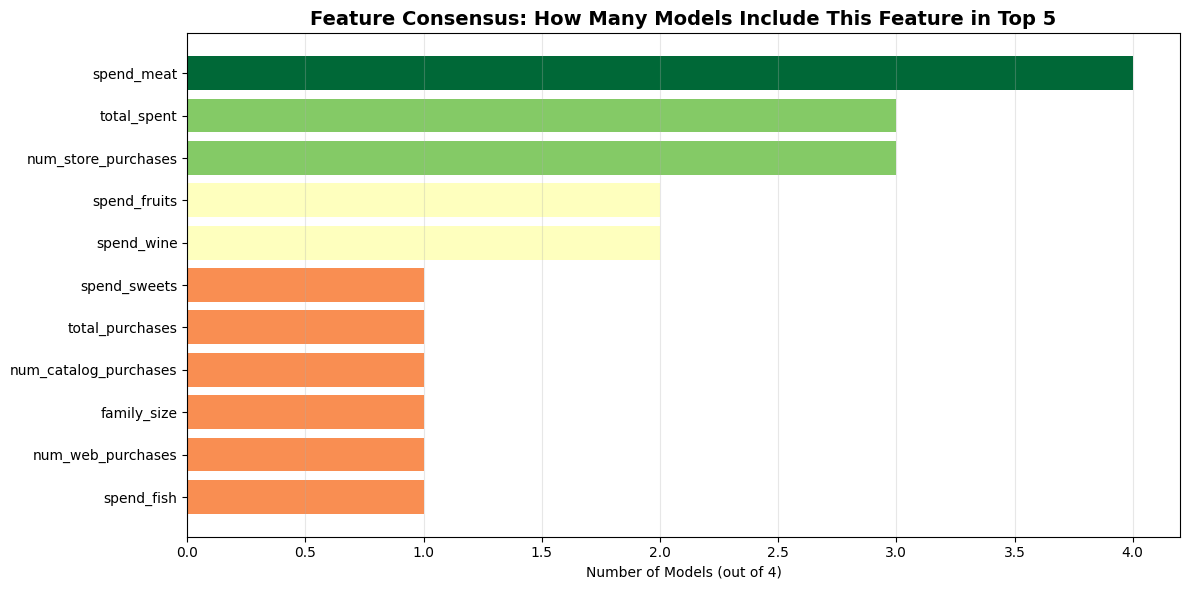


🌟 Most Consistent Features: ['spend_meat', 'total_spent', 'num_store_purchases']


In [150]:
all_features = set()
for model_name in models_with_importance:
    if model_name in feature_importances:
        top_5 = feature_importances[model_name].head(5)['Feature'].tolist()
        all_features.update(top_5)

feature_counts = {}
for feature in all_features:
    count = 0
    for model_name in models_with_importance:
        if model_name in feature_importances:
            top_5 = feature_importances[model_name].head(5)['Feature'].tolist()
            if feature in top_5:
                count += 1
    feature_counts[feature] = count

# Sort by consensus
consensus_df = pd.DataFrame(list(feature_counts.items()), columns=['Feature', 'Models Count'])
consensus_df = consensus_df.sort_values('Models Count', ascending=False)

print("\n" + "=" * 80)
print("FEATURE CONSENSUS ANALYSIS")
print("=" * 80)
print("Features appearing in top 5 across multiple models:")
print(consensus_df.to_string(index=False))
print("=" * 80)

# Visualize consensus
plt.figure(figsize=(12, 6))
colors = plt.cm.RdYlGn(consensus_df['Models Count'] / consensus_df['Models Count'].max())
plt.barh(consensus_df['Feature'], consensus_df['Models Count'], color=colors)
plt.xlabel('Number of Models (out of 4)')
plt.title('Feature Consensus: How Many Models Include This Feature in Top 5', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n🌟 Most Consistent Features: {consensus_df.head(3)['Feature'].tolist()}")

# Interactive Prediction System

Create a system to predict customer segments based on user input and model selection.

In [151]:
# Store all trained models in a dictionary
models_dict = {
    'Logistic Regression': lr_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'K-Nearest Neighbors': knn_model,
    'Naive Bayes': nb_model,
    'XGBoost': xgb_model
}

print("✅ All models saved successfully!")
print(f"Available models: {list(models_dict.keys())}")

✅ All models saved successfully!
Available models: ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'Naive Bayes', 'XGBoost']


In [152]:
def predict_with_model(model_name, customer_data):

    if model_name not in models_dict:
        print(f"❌ Error: Model '{model_name}' not found!")
        print(f"Available models: {list(models_dict.keys())}")
        return None

    # Convert dict to DataFrame if needed
    if isinstance(customer_data, dict):
        customer_df = pd.DataFrame([customer_data])
    else:
        customer_df = customer_data.copy()

    # Ensure all required features are present
    required_features = feature_names.tolist()
    missing_features = set(required_features) - set(customer_df.columns)

    if missing_features:
        print(f"❌ Missing features: {missing_features}")
        return None

    # Select only required features in correct order
    customer_df = customer_df[required_features]

    # Apply same preprocessing as training data
    customer_df[cols_to_standardize] = scaler.transform(customer_df[cols_to_standardize])

    # Get the selected model
    model = models_dict[model_name]

    # Make prediction
    prediction = model.predict(customer_df)[0]

    print("=" * 60)
    print(f"🎯 MODEL: {model_name}")
    print("=" * 60)
    print(f"Predicted Segment: {prediction}")
    print("=" * 60)

    return prediction

## Example Usage

How to use the prediction system with different models

In [153]:
# Example: Create a sample customer
sample_customer = {
    'education_level': 1,  # Encoded value
    'annual_income': 50000,
    'num_children': 1,
    'num_teenagers': 0,
    'days_since_last_purchase': 30,
    'spend_wine': 300,
    'spend_fruits': 50,
    'spend_meat': 200,
    'spend_fish': 80,
    'spend_sweets': 40,
    'spend_gold': 60,
    'num_discount_purchases': 2,
    'num_web_purchases': 5,
    'num_catalog_purchases': 3,
    'num_store_purchases': 8,
    'web_visits_last_month': 4,
    'total_accepted_campaigns': 1,
    'age': 45,
    'signup_year': 2013,
    'total_spent': 730,
    'total_purchases': 18,
    'children': 1,
    'family_size': 3
}

# Test with different models
print("Testing with sample customer data:\n")

# Try Random Forest
predict_with_model('Random Forest', sample_customer)

Testing with sample customer data:

🎯 MODEL: Random Forest
Predicted Segment: 1


np.int32(1)

In [154]:
# Try XGBoost
predict_with_model('XGBoost', sample_customer)

🎯 MODEL: XGBoost
Predicted Segment: 1


np.int64(1)

In [155]:

predict_with_model('Logistic Regression', sample_customer)

🎯 MODEL: Logistic Regression
Predicted Segment: 1


np.int32(1)

## Interactive Model Comparison

Compare predictions from all models for the same customer

In [156]:
def compare_all_models(customer_data):

    results = []

    for model_name in models_dict.keys():
        prediction = predict_with_model(model_name, customer_data)
        results.append({
            'Model': model_name,
            'Predicted Segment': prediction
        })
        print()  

    comparison_df = pd.DataFrame(results)

    print("\n" + "=" * 60)
    print("📊 PREDICTION COMPARISON - ALL MODELS")
    print("=" * 60)
    print(comparison_df.to_string(index=False))
    print("=" * 60)

    # Visualize
    plt.figure(figsize=(10, 6))
    plt.barh(comparison_df['Model'], comparison_df['Predicted Segment'], color='skyblue', edgecolor='black')
    plt.xlabel('Predicted Segment')
    plt.title('Model Predictions Comparison', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

    return comparison_df

🎯 MODEL: Logistic Regression
Predicted Segment: 1

🎯 MODEL: Decision Tree
Predicted Segment: 0

🎯 MODEL: Random Forest
Predicted Segment: 1

🎯 MODEL: K-Nearest Neighbors
Predicted Segment: 1

🎯 MODEL: Naive Bayes
Predicted Segment: 0

🎯 MODEL: XGBoost
Predicted Segment: 1


📊 PREDICTION COMPARISON - ALL MODELS
              Model  Predicted Segment
Logistic Regression                  1
      Decision Tree                  0
      Random Forest                  1
K-Nearest Neighbors                  1
        Naive Bayes                  0
            XGBoost                  1


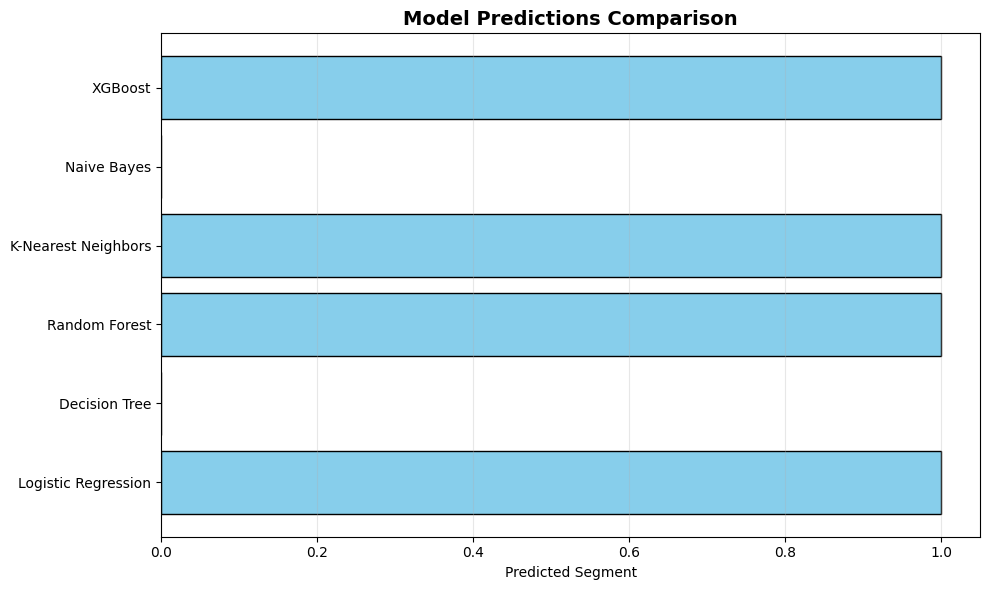

In [157]:
# Compare all models for the sample customer
comparison_results = compare_all_models(sample_customer)

## Custom Prediction - Your Turn!

Now you can enter your own customer data and choose which model to use

In [158]:
# Step 1: Define your customer data
my_customer = {
    'education_level': 2,  # 0=Graduate, 1=Postgraduate, 2=Undergraduate
    'annual_income': 60000,
    'num_children': 2,
    'num_teenagers': 1,
    'days_since_last_purchase': 15,
    'spend_wine': 400,
    'spend_fruits': 70,
    'spend_meat': 250,
    'spend_fish': 100,
    'spend_sweets': 50,
    'spend_gold': 80,
    'num_discount_purchases': 3,
    'num_web_purchases': 6,
    'num_catalog_purchases': 2,
    'num_store_purchases': 10,
    'web_visits_last_month': 5,
    'total_accepted_campaigns': 0,
    'age': 38,
    'signup_year': 2012,
    'total_spent': 950,
    'total_purchases': 21,
    'children': 3,
    'family_size': 0
}
my_customer['family_size']=my_customer['children']+2

# Step 2: Choose your model
chosen_model = 'Random Forest'  # Change this to any model from the list

# Step 3: Get prediction
print(f"🎯 Using model: {chosen_model}\n")
prediction = predict_with_model(chosen_model, my_customer)

🎯 Using model: Random Forest

🎯 MODEL: Random Forest
Predicted Segment: 1


# Task
Visualize K-Means and DBSCAN clusters side-by-side using 3 PCA components to compare their results. This will involve updating the selected cell to generate two 3D scatter plots within the same figure, one for each clustering method, to facilitate visual comparison of their structures and how they group data points in the PCA space.

## compare_clusters_visualization

### Subtask:
Visualize K-Means and DBSCAN clusters side-by-side using 3 PCA components to compare their results. This will involve updating the selected cell to generate two 3D scatter plots within the same figure, one for each clustering method, to facilitate visual comparison of their structures and how they group data points in the PCA space.


## Summary:

### Data Analysis Key Findings
*   A side-by-side visualization of K-Means and DBSCAN clusters was generated using three principal components (PCA) to enable a direct comparison of their structural differences.
*   The visualization in 3D PCA space is designed to highlight how each algorithm groups data points and identifies cluster boundaries.

### Insights or Next Steps
*   This visual comparison provides critical insights into the differing behaviors of K-Means (which assumes spherical clusters and assigns all points to a cluster) and DBSCAN (which identifies density-based clusters and can mark outliers as noise).
*   Future analysis should involve quantitative metrics (e.g., silhouette scores, adjusted Rand index) to complement the visual assessment and provide a more objective evaluation of the clustering performance.
